## Note:  

- In the csv files, some of the States were not mapped to their respective Regions correctly
- Made appropriate changes in those csv files 

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix,accuracy_score,precision_score,f1_score,roc_auc_score,classification_report,confusion_matrix
from sklearn.metrics import recall_score

In [5]:
df1= pd.read_csv("Loan_Details_transactions.csv")
df1.head(2)

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,1,1,0,0,0,0,0,0,0yrs 0mon,0
1,2,48749,69303,72.15,67,CT03,ST24,600020,01-01-1991,Salaried,...,1,1,0,0,0,0,783,0,2yrs 6mon,0


In [6]:
df1.columns

Index(['Loan_Id', 'Disbursed_Amount', 'Asset_Cost', 'ltv', 'Branch_Id',
       'City_Code', 'State_Code', 'Postal_Code', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [7]:
df1.shape

(23315, 21)

In [8]:
df2= pd.read_csv("Branch_ID_Master.csv")
df3= pd.read_excel("City_Master.xlsx")
df4= pd.read_csv("Loan_status_mapping.csv")
df5= pd.read_excel("Postal_Code_Master.xlsx")
df6= pd.read_excel("Region_Master.xlsx")
df7= pd.read_excel("State_Master.xlsx")
df8= pd.read_excel("State_Region_Mapping2.xlsx")

In [9]:
df2.columns

Index(['Branch_Id', 'Region_Code'], dtype='object')

In [10]:
df3.columns

Index(['City_Code', 'State_Code', 'City_Name'], dtype='object')

In [11]:
df4.columns

Index(['Loan_Id', 'Loan_Default'], dtype='object')

In [12]:
df5.columns

Index(['City_Code', 'City_Name', 'Postal_Code'], dtype='object')

In [13]:
df6.columns

Index(['Region_ID', 'Region_Name'], dtype='object')

In [14]:
df7.columns

Index(['State_Code', 'State_Name'], dtype='object')

In [15]:
df8.columns

Index(['State_Code', 'State_Name', 'Region_Name', 'Region_ID'], dtype='object')

In [16]:
#Merging df1 with df7 to get State Name

dfc= df1.merge(df7, on= "State_Code", how="left")
dfc.shape

(23315, 22)

In [17]:
dfc.head(1)

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,State_Name
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,Maharashtra


In [18]:
df8.head(1)

,State_Code,State_Name,Region_Name,Region_ID
0,ST01,Andhra Pradesh,South,R2


In [19]:
#Merging dfc with df8 to get Region name, Region ID

dfc= dfc.merge(df8[["State_Code","Region_Name","Region_ID"]], on= "State_Code", how="left")
dfc.shape

(23315, 24)

In [20]:
#Merging dfc with df3 to get City name

dfc= dfc.merge(df3[['City_Code', 'City_Name']], on= "City_Code", how="left")
dfc.shape

(23315, 25)

In [21]:
dfc.head(2)

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,State_Name,Region_Name,Region_ID,City_Name
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,0,0,0,0,0yrs 0mon,0,Maharashtra,West,R4,Mumbai
1,2,48749,69303,72.15,67,CT03,ST24,600020,01-01-1991,Salaried,...,0,0,783,0,2yrs 6mon,0,Tamil Nadu,South,R2,Chennai


In [22]:
#Merging dfc with df4 to get Loan Default status

dfc= dfc.merge(df4, on= 'Loan_Id', how="left")
dfc.shape

(23315, 26)

In [23]:
dfc.head(3)

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,State_Name,Region_Name,Region_ID,City_Name,Loan_Default
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,0,0,0,0yrs 0mon,0,Maharashtra,West,R4,Mumbai,0
1,2,48749,69303,72.15,67,CT03,ST24,600020,01-01-1991,Salaried,...,0,783,0,2yrs 6mon,0,Tamil Nadu,South,R2,Chennai,0
2,3,55348,66340,85.00,2,CT13,ST04,801110,16-08-1993,Self employed,...,0,0,0,0yrs 0mon,0,Bihar,East,R3,Patna,1


In [24]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23315 entries, 0 to 23314
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Loan_Id                              23315 non-null  int64  
 1   Disbursed_Amount                     23315 non-null  int64  
 2   Asset_Cost                           23315 non-null  int64  
 3   ltv                                  23315 non-null  float64
 4   Branch_Id                            23315 non-null  int64  
 5   City_Code                            23315 non-null  object 
 6   State_Code                           23315 non-null  object 
 7   Postal_Code                          23315 non-null  int64  
 8   Date_of_Birth                        23315 non-null  object 
 9   Employment_Type                      22545 non-null  object 
 10  DisbursalDate                        23315 non-null  object 
 11  MobileNo_Avl_Flag           

In [25]:
dfc.isnull().sum()  # Checking for missing values

Loan_Id                                  0
Disbursed_Amount                         0
Asset_Cost                               0
ltv                                      0
Branch_Id                                0
City_Code                                0
State_Code                               0
Postal_Code                              0
Date_of_Birth                            0
Employment_Type                        770
DisbursalDate                            0
MobileNo_Avl_Flag                        0
Aadhar_flag                              0
PAN_flag                                 0
VoterID_flag                             0
Driving_flag                             0
Passport_flag                            0
PERFORM_CNS.SCORE                        0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS      0
CREDIT.HISTORY.LENGTH                    0
NO.OF_INQUIRIES                          0
State_Name                               0
Region_Name                              0
Region_ID  

## Only Employment_Type is having missing values (770)

In [26]:
# Percentage of missing values for Employment type
p = (770/dfc.shape[0])*100
print(p)

3.3025948959897065


In [27]:
dfc['Employment_Type'].value_counts()

Self employed    12724
Salaried          9821
Name: Employment_Type, dtype: int64

In [28]:
# There is higher chance that missing 'Employment_Type' could be Self Employed since Salaried customers should mention it,
# moreover Self employed type is the mode in Employment_type feature 


In [29]:
# Imputing missing values with Self employed type
dfc['Employment_Type'] = dfc['Employment_Type'].replace(np.nan, 'Self employed')

In [30]:
dfc['Employment_Type'].value_counts()

Self employed    13494
Salaried          9821
Name: Employment_Type, dtype: int64

In [31]:
dfc.isnull().sum() 

Loan_Id                                0
Disbursed_Amount                       0
Asset_Cost                             0
ltv                                    0
Branch_Id                              0
City_Code                              0
State_Code                             0
Postal_Code                            0
Date_of_Birth                          0
Employment_Type                        0
DisbursalDate                          0
MobileNo_Avl_Flag                      0
Aadhar_flag                            0
PAN_flag                               0
VoterID_flag                           0
Driving_flag                           0
Passport_flag                          0
PERFORM_CNS.SCORE                      0
DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS    0
CREDIT.HISTORY.LENGTH                  0
NO.OF_INQUIRIES                        0
State_Name                             0
Region_Name                            0
Region_ID                              0
City_Name       

In [32]:
dfc.duplicated().sum() # Checking for duplicates

0

##  No duplicate entries present

In [33]:
# convert Date_of_Birth to datetime 

dfc['Date_of_Birth'] = pd.to_datetime(dfc['Date_of_Birth'])
print(dfc['Date_of_Birth'].head(5))
print("---------------------------------------")
print(dfc['Date_of_Birth'].tail(5))

0   1990-06-14
1   1991-01-01
2   1993-08-16
3   1989-01-01
4   1974-12-31
Name: Date_of_Birth, dtype: datetime64[ns]
---------------------------------------
23310   1982-12-14
23311   1993-03-07
23312   1994-01-01
23313   1982-10-10
23314   1976-01-02
Name: Date_of_Birth, dtype: datetime64[ns]


In [34]:
# convert Disbursal date to datetime 

dfc['DisbursalDate'] = pd.to_datetime(dfc['DisbursalDate'])

In [35]:
print(dfc['DisbursalDate'].head(5))
print("---------------------------------------")
print(dfc['DisbursalDate'].tail(5))

0   2018-09-28
1   2018-10-09
2   2018-08-31
3   2018-10-13
4   2018-09-14
Name: DisbursalDate, dtype: datetime64[ns]
---------------------------------------
23310   2018-08-26
23311   2018-09-23
23312   2018-10-23
23313   2018-08-25
23314   2018-03-10
Name: DisbursalDate, dtype: datetime64[ns]


In [36]:
# creating a new column 'Age' to show the age of customer while accepting loan
dfc['Age']= dfc['DisbursalDate']- dfc['Date_of_Birth']

In [37]:
dfc['Age'].head(5)

0   10333 days
1   10143 days
2    9146 days
3   10877 days
4   15963 days
Name: Age, dtype: timedelta64[ns]

In [38]:
dfc['Age']= dfc['Age'].astype(str)

In [39]:
dfc['Age'].head(5)

0    10333 days
1    10143 days
2     9146 days
3    10877 days
4    15963 days
Name: Age, dtype: object

In [40]:
dfc['Age']= dfc['Age'].str.split(expand=True)[0]
dfc['Age'].head(5)

0    10333
1    10143
2     9146
3    10877
4    15963
Name: Age, dtype: object

In [41]:
dfc['Age']= dfc['Age'].astype(float)
dfc['Age'].head(3)

0    10333.0
1    10143.0
2     9146.0
Name: Age, dtype: float64

In [42]:
dfc['Age']= round(dfc['Age']/365,0)

In [43]:
dfc['Age'].head(5)

0    28.0
1    28.0
2    25.0
3    30.0
4    44.0
Name: Age, dtype: float64

In [44]:
dfc['Age'].tail(5)

23310    36.0
23311    26.0
23312    25.0
23313    36.0
23314    42.0
Name: Age, dtype: float64

In [45]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23315 entries, 0 to 23314
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Loan_Id                              23315 non-null  int64         
 1   Disbursed_Amount                     23315 non-null  int64         
 2   Asset_Cost                           23315 non-null  int64         
 3   ltv                                  23315 non-null  float64       
 4   Branch_Id                            23315 non-null  int64         
 5   City_Code                            23315 non-null  object        
 6   State_Code                           23315 non-null  object        
 7   Postal_Code                          23315 non-null  int64         
 8   Date_of_Birth                        23315 non-null  datetime64[ns]
 9   Employment_Type                      23315 non-null  object        
 10  DisbursalD

In [46]:
dfc["CREDIT.HISTORY.LENGTH"]

0         0yrs 0mon
1         2yrs 6mon
2         0yrs 0mon
3         0yrs 0mon
4         3yrs 1mon
            ...    
23310    5yrs 10mon
23311     0yrs 9mon
23312     2yrs 3mon
23313     0yrs 6mon
23314    3yrs 11mon
Name: CREDIT.HISTORY.LENGTH, Length: 23315, dtype: object

### Need to change format of "CREDIT.HISTORY.LENGTH" into months

In [47]:
l= list(dfc['CREDIT.HISTORY.LENGTH'])

In [48]:
months= []
for i in l:
    y= float(i.split("yrs")[0])
        
    m1= float(i.split(" ")[1].split("mon")[0])
    m2= y*12
    mfinal= m1+m2
    months.append(mfinal)
    
months    

[0.0,
 30.0,
 0.0,
 0.0,
 37.0,
 182.0,
 22.0,
 0.0,
 0.0,
 46.0,
 0.0,
 0.0,
 24.0,
 0.0,
 0.0,
 11.0,
 13.0,
 0.0,
 13.0,
 0.0,
 0.0,
 0.0,
 0.0,
 16.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 23.0,
 0.0,
 53.0,
 0.0,
 20.0,
 0.0,
 0.0,
 2.0,
 0.0,
 11.0,
 8.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 162.0,
 0.0,
 36.0,
 69.0,
 0.0,
 0.0,
 24.0,
 64.0,
 0.0,
 6.0,
 0.0,
 15.0,
 0.0,
 150.0,
 16.0,
 0.0,
 0.0,
 54.0,
 0.0,
 0.0,
 0.0,
 50.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.0,
 0.0,
 0.0,
 0.0,
 23.0,
 0.0,
 82.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 22.0,
 0.0,
 13.0,
 0.0,
 0.0,
 0.0,
 25.0,
 21.0,
 35.0,
 0.0,
 0.0,
 16.0,
 47.0,
 8.0,
 2.0,
 0.0,
 24.0,
 0.0,
 0.0,
 54.0,
 0.0,
 0.0,
 78.0,
 77.0,
 0.0,
 0.0,
 0.0,
 0.0,
 47.0,
 0.0,
 9.0,
 11.0,
 0.0,
 0.0,
 6.0,
 30.0,
 20.0,
 0.0,
 34.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.0,
 21.0,
 131.0,
 0.0,
 1.0,
 14.0,
 30.0,
 0.0,
 64.0,
 25.0,
 5.0,
 39.0,
 0.0,
 81.0,
 40.0,
 0.0,
 42.0,
 139.0,
 0.0,
 7.0,
 0.0,


In [49]:
dfc['CREDIT.HISTORY.LENGTH_in_months'] = months

In [50]:
dfc['CREDIT.HISTORY.LENGTH_in_months']

0         0.0
1        30.0
2         0.0
3         0.0
4        37.0
         ... 
23310    70.0
23311     9.0
23312    27.0
23313     6.0
23314    47.0
Name: CREDIT.HISTORY.LENGTH_in_months, Length: 23315, dtype: float64

In [51]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23315 entries, 0 to 23314
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Loan_Id                              23315 non-null  int64         
 1   Disbursed_Amount                     23315 non-null  int64         
 2   Asset_Cost                           23315 non-null  int64         
 3   ltv                                  23315 non-null  float64       
 4   Branch_Id                            23315 non-null  int64         
 5   City_Code                            23315 non-null  object        
 6   State_Code                           23315 non-null  object        
 7   Postal_Code                          23315 non-null  int64         
 8   Date_of_Birth                        23315 non-null  datetime64[ns]
 9   Employment_Type                      23315 non-null  object        
 10  DisbursalD

In [52]:
dfc.columns

Index(['Loan_Id', 'Disbursed_Amount', 'Asset_Cost', 'ltv', 'Branch_Id',
       'City_Code', 'State_Code', 'Postal_Code', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'State_Name', 'Region_Name',
       'Region_ID', 'City_Name', 'Loan_Default', 'Age',
       'CREDIT.HISTORY.LENGTH_in_months'],
      dtype='object')

## Identifying unwanted columns

In [53]:
dfc['MobileNo_Avl_Flag'].value_counts()

1    23315
Name: MobileNo_Avl_Flag, dtype: int64

- 'MobileNo_Avl_Flag' column is not important because every customer has mobile number
- Furthermore loan id, branch id,city code,state code, postal code, date of birth, disbursal date, mobile no flag, 'CREDIT.HISTORY.LENGTH', region_id are not needed
- Result: dropping total 10 columns


In [54]:
dfc.to_excel("minipro_loan1.xlsx")

In [55]:
ln= dfc[['Disbursed_Amount', 'Asset_Cost', 'ltv', 
       'Employment_Type', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
        'NO.OF_INQUIRIES', 'State_Name', 'Region_Name',
        'City_Name', 'Loan_Default', 'Age',
       'CREDIT.HISTORY.LENGTH_in_months']]

In [56]:
ln.shape

(23315, 18)

In [57]:
dfc.shape

(23315, 28)

In [58]:
ln.columns

Index(['Disbursed_Amount', 'Asset_Cost', 'ltv', 'Employment_Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag', 'PERFORM_CNS.SCORE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 'State_Name',
       'Region_Name', 'City_Name', 'Loan_Default', 'Age',
       'CREDIT.HISTORY.LENGTH_in_months'],
      dtype='object')

In [59]:
num_cols= ['Disbursed_Amount', 'Asset_Cost', 'ltv', 
            'PERFORM_CNS.SCORE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 
        'Age', 'CREDIT.HISTORY.LENGTH_in_months']
len(num_cols)

8

In [60]:
ln_num= ln[['Disbursed_Amount', 'Asset_Cost', 'ltv', 
            'PERFORM_CNS.SCORE',
       'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', 'NO.OF_INQUIRIES', 
        'Age', 'CREDIT.HISTORY.LENGTH_in_months']]

ln_num.shape

(23315, 8)

In [61]:
cat_cols= ['Employment_Type', 'State_Name', 'Region_Name', 'City_Name', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 
           'Driving_flag','Passport_flag', 'Loan_Default'
           ]
len(cat_cols)

10

In [62]:
# Checking no: of sub-categories for each categorical columns
for i in cat_cols:
    print(i,":",ln[i].nunique())

Employment_Type : 2
State_Name : 18
Region_Name : 6
City_Name : 29
Aadhar_flag : 2
PAN_flag : 2
VoterID_flag : 2
Driving_flag : 2
Passport_flag : 2
Loan_Default : 2


In [63]:
## State_Name & City_Name are having high number of subcategories (18 & 29)
# Removing City_Name due to high number of sub-categories

In [64]:
cat_cols= ['Employment_Type', 'State_Name', 'Region_Name', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 
           'Driving_flag','Passport_flag', 'Loan_Default']
len(cat_cols)

9

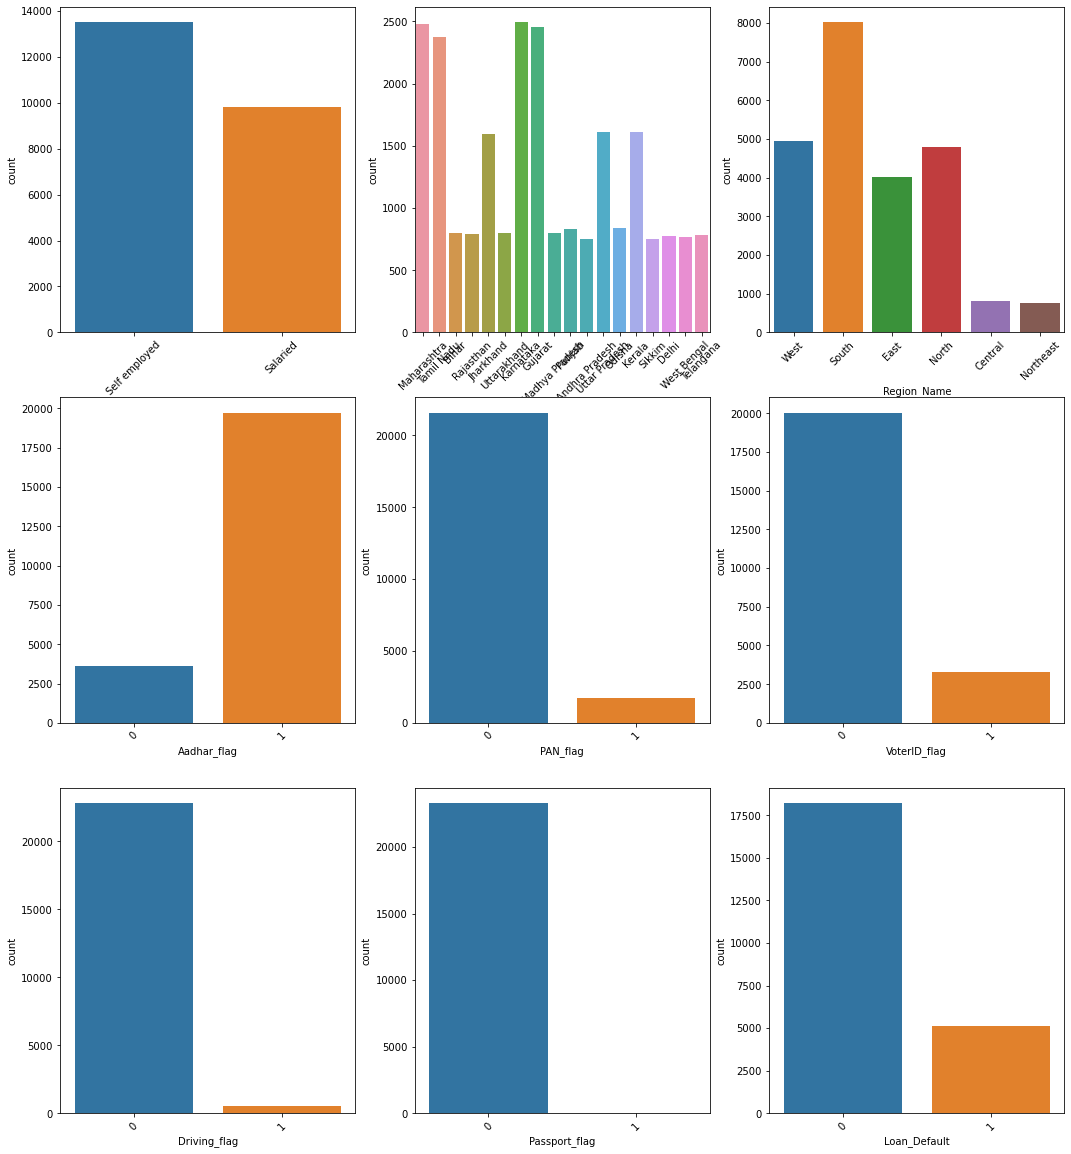

In [65]:
# Countplot for categorical variables

plt.figure(figsize=(18,85))
plot_num=1
for i in cat_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.countplot(x=i,data=ln)
    plt.xticks(rotation=45)
    plot_num+=1
plt.show()

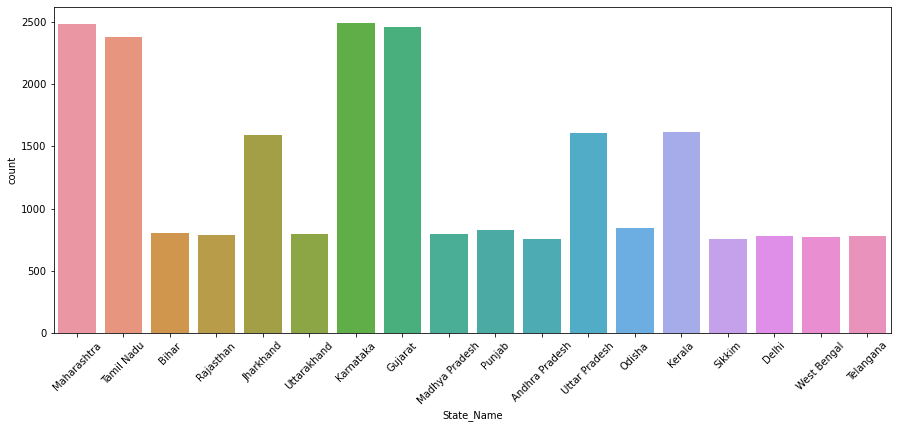

In [66]:
#Plotting countplot for States again separately

plt.figure(figsize=(15,6))
sns.countplot(x=ln['State_Name'])
plt.xticks(rotation=45)
plt.show()

- In Employment_Type--> Self_employed class is more
- In States--> Maharashtra, Tamil Nadu, Karnataka and Gujarat are having high counts
- In Regions--> South is dominating
- In Aadhar flag --> Customers who shared Aadhar are more
- In PAN flag --> Customers who did not share PAN are more
- In Voter_ID flag --> Customers who did not share Voter_ID are more
- In Driving_Licence flag --> Customers who did not share DL are more
- In Passport flag --> Negligible Customers shared Passport (This feature can be dropped)
- Lower number of customers defaulted in Loan_Default feature

In [67]:
# Dropping Passport flag because only negligible number of customers have shared this information
ln.drop(['Passport_flag'], axis=1, inplace=True)
ln.shape

(23315, 17)

In [68]:
ln.to_excel("minipro_loan.xlsx")

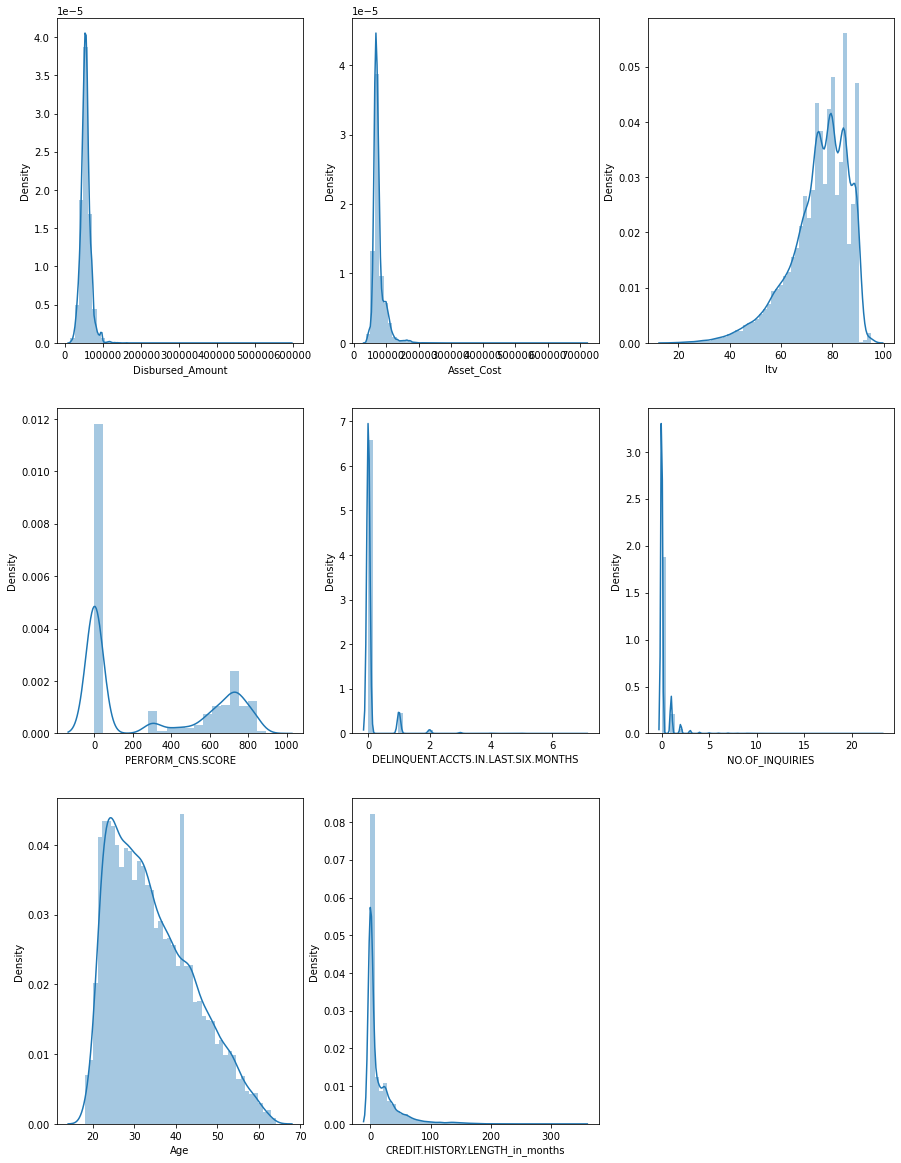

In [69]:
# Distplot for Numerical variables
plt.figure(figsize=(15,85))
plot_num=1
for i in num_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.distplot(ln[i])
    plot_num+=1
plt.show()

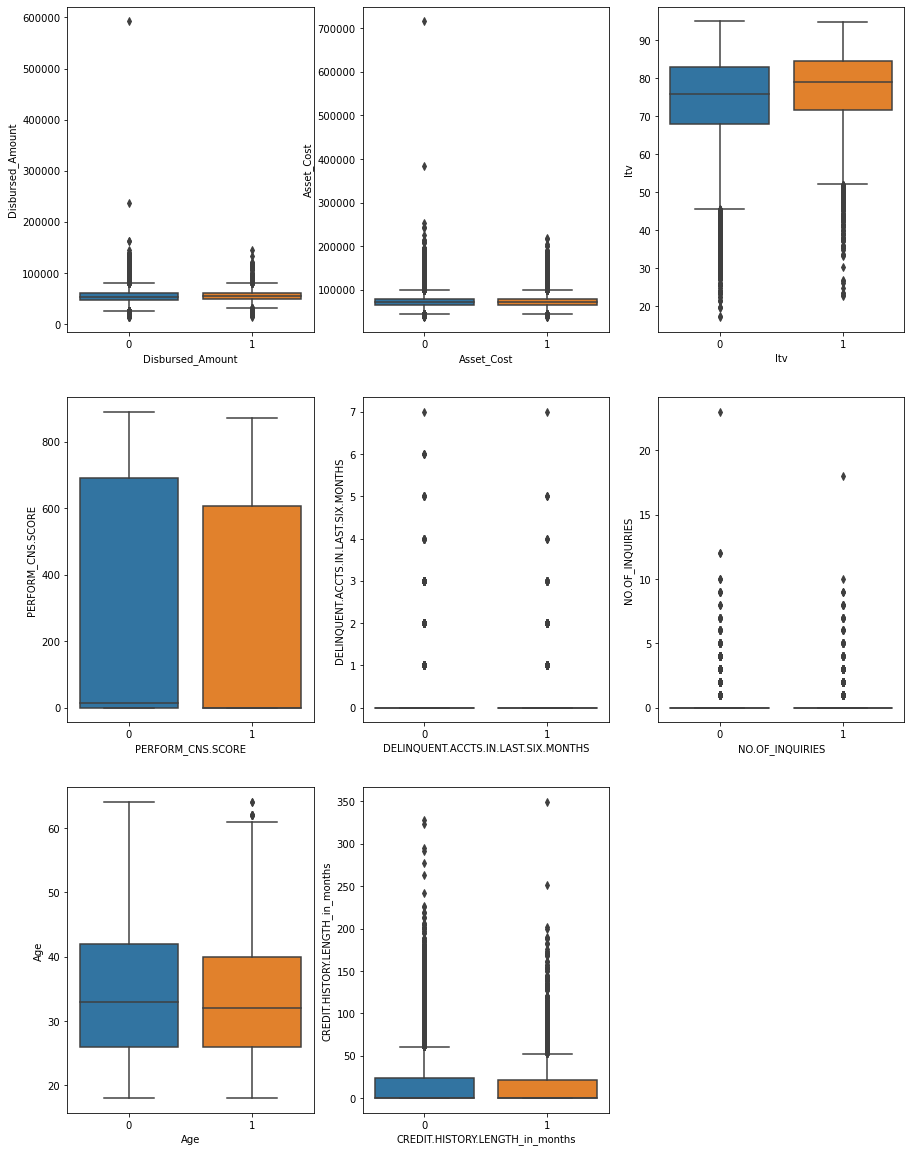

In [70]:
# Plotting boxplot of features with respect to target variable.
plt.figure(figsize=(15,85))
plot_num=1
for i in num_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(x='Loan_Default',y=ln[i],data=ln)
    plt.xlabel(i)
    plot_num+=1
plt.show()

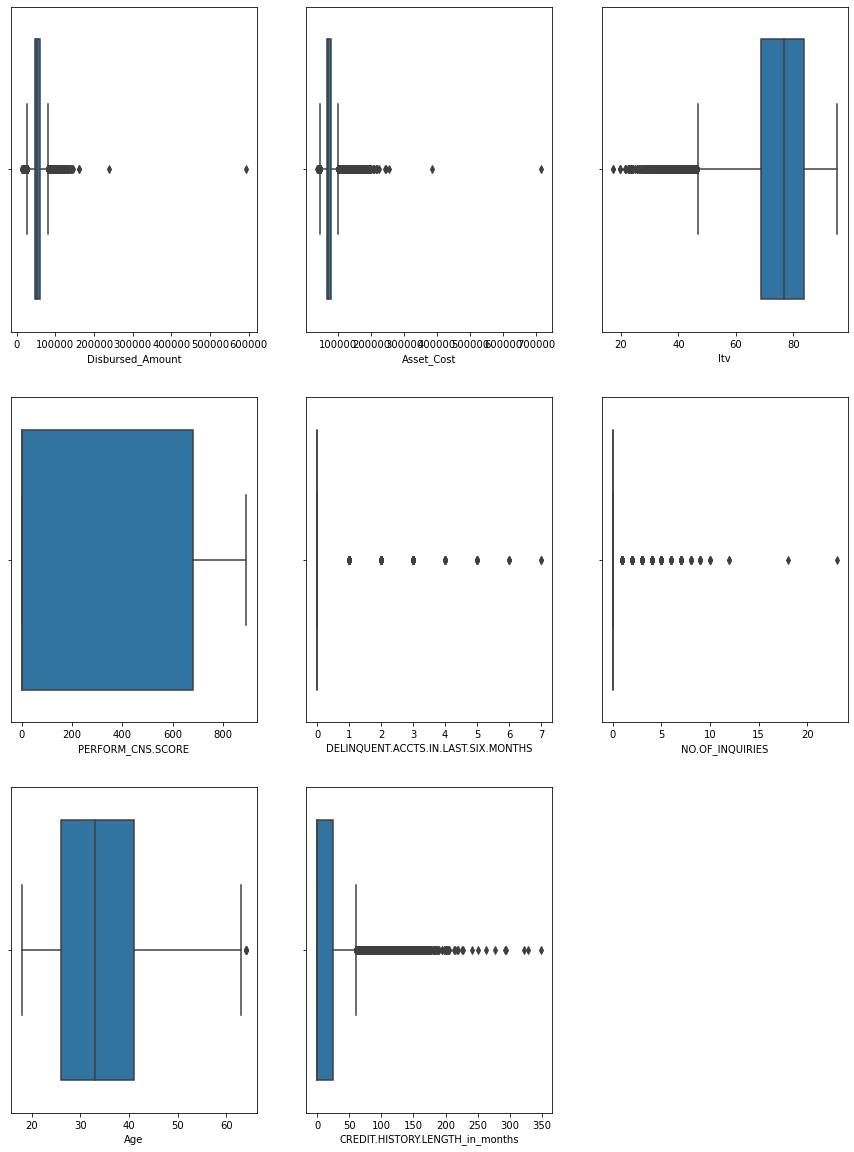

In [71]:
# Boxplot for outliers

plt.figure(figsize=(15,85))
plot_num=1
for i in num_cols:
    ax=plt.subplot(12,3,plot_num)
    sns.boxplot(ln[i])
    plt.xlabel(i)
    plot_num+=1
plt.show()

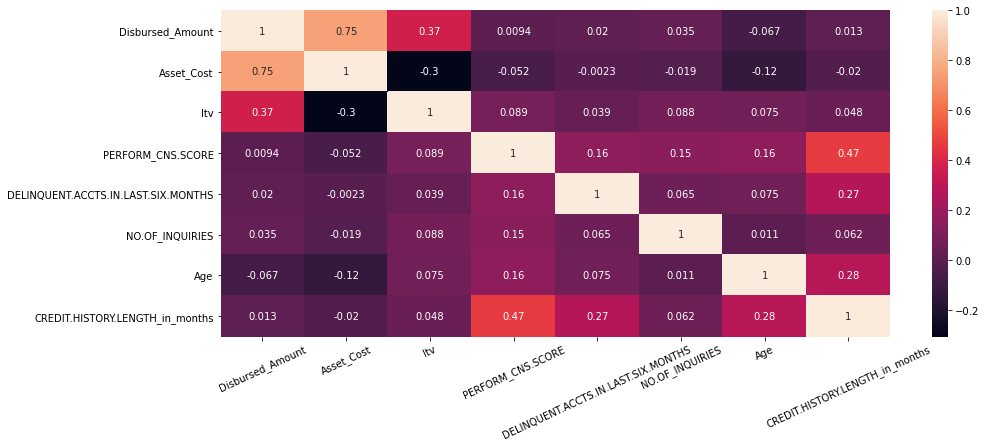

In [72]:
# Plotting heatmap to see the correlation among numerical variables
plt.figure(figsize=(15,6))
sns.heatmap(ln_num.corr(),annot=True)
plt.xticks(rotation=25)
plt.show()

- High positive correlation between disbursed Amount  and Asset_cost (0.75)
- Positive correlation between Perform_CNS_Score and Credit history length (0.47)
- Positive correlation between Age and Credit history length (0.28)
- Positive correlation between Delinquent Accts in last 6 mths and Credit history length (0.27)

In [73]:
ln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23315 entries, 0 to 23314
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Disbursed_Amount                     23315 non-null  int64  
 1   Asset_Cost                           23315 non-null  int64  
 2   ltv                                  23315 non-null  float64
 3   Employment_Type                      23315 non-null  object 
 4   Aadhar_flag                          23315 non-null  int64  
 5   PAN_flag                             23315 non-null  int64  
 6   VoterID_flag                         23315 non-null  int64  
 7   Driving_flag                         23315 non-null  int64  
 8   PERFORM_CNS.SCORE                    23315 non-null  int64  
 9   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  23315 non-null  int64  
 10  NO.OF_INQUIRIES                      23315 non-null  int64  
 11  State_Name                  

In [74]:
## Plotting Loan_Deault Category

In [75]:
ln['Loan_Default'].value_counts()

0    18189
1     5126
Name: Loan_Default, dtype: int64

In [76]:
# Percentage of defaulted customers
ln_default= round((ln['Loan_Default'].value_counts()[1]/ln.shape[0])*100,2)
ln_default

21.99

<AxesSubplot:xlabel='Loan_Default', ylabel='count'>

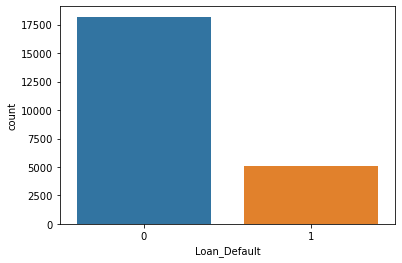

In [77]:
sns.countplot(x="Loan_Default", data=ln)

## Result: Loan_Default is imbalanced

In [78]:
default= ln[ln['Loan_Default']==1]
default.shape

(5126, 17)

## Statistical Tests for Feature Selection

## 1) Plotting Employment_type count plot among defaulted customers

<AxesSubplot:xlabel='Employment_Type', ylabel='count'>

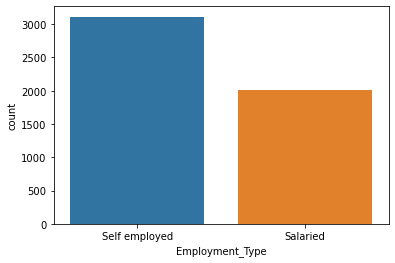

In [79]:
sns.countplot(x="Employment_Type", data=default)

In [80]:
default['Employment_Type'].value_counts()

Self employed    3111
Salaried         2015
Name: Employment_Type, dtype: int64

## From the graph, Self employed customers are more among defaulted customers

## Hypothesis Test  

- Test whether the default proportion is different from Self_employed and Salaried?

### Two Sample Test of proportion @ 5% significance level

- H0: Deault Proportion of P_Self_employed= P_Salaried

- H1: Default Proportion of P_Self_employed != P_Salaried

In [81]:
pd.crosstab(ln.Employment_Type,ln.Loan_Default,margins=True)

Loan_Default,0,1,All
Employment_Type,,,
Salaried,7806,2015,9821
Self employed,10383,3111,13494
All,18189,5126,23315


In [82]:
alpha=0.05

x_self= 3111
n_self =13494
x_sal=2015
n_sal=9821

In [83]:
proportions_ztest([x_self,x_sal],[n_self,n_sal])

(4.61919849566392, 3.85225201980233e-06)

### Since p value  < alpha(0.05) --> reject H0

### We can conclude that there is a difference in default proportion among Self employed and Salaried customers

## Hypothesis Test  

- Test whether the default proportion is lower for salaried customers

### One Sample Test of proportion @ 5% significance level

- H0: Default Proportion of P_Salaried= 0.5

- H1: Default Proportion of P_Salaried <0.5

In [84]:
pd.crosstab(ln.Employment_Type,ln.Loan_Default,margins=True)

Loan_Default,0,1,All
Employment_Type,,,
Salaried,7806,2015,9821
Self employed,10383,3111,13494
All,18189,5126,23315


In [85]:
P=0.5
x= 2015
n= 5126

In [86]:
proportions_ztest(x,n,0.5,alternative='smaller')

(-15.67048105135691, 1.2037516157824494e-55)

### Since p value < alpha(0.05) --> reject H0

### We can conclude that default proportion of salaried customers is lower than Self_employed

## 2) Plotting  'Aadhar_flag' count plot among defaulted customers

<AxesSubplot:xlabel='Aadhar_flag', ylabel='count'>

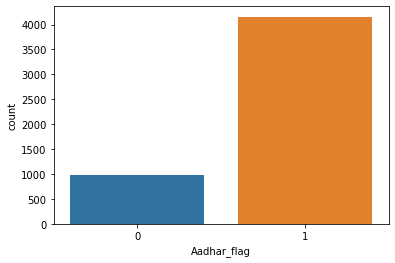

In [87]:
sns.countplot(x= 'Aadhar_flag', data=default)

In [88]:
default['Aadhar_flag'].value_counts()

1    4155
0     971
Name: Aadhar_flag, dtype: int64

## From the graph,  customers who shared Aadhar info are more among defaulted customers

## Hypothesis Test  

- Test whether the default proportion is higher for  customers who shared Aadhar

### One Sample Test of proportion @ 5% significance level

- H0: Default Proportion of P_Aadhar_shared= 0.5

- H1: Default Proportion of P_Aadhar_shared >0.5

In [89]:
pd.crosstab(ln.Aadhar_flag,ln.Loan_Default,margins=True)

Loan_Default,0,1,All
Aadhar_flag,,,
0,2641,971,3612
1,15548,4155,19703
All,18189,5126,23315


In [90]:
P=0.5
x= 4155
n= 5126

In [91]:
proportions_ztest(x,n,0.5,alternative='larger')

(56.74625892010687, 0.0)

### Since p value < alpha(0.05) --> reject H0

### We can conclude that default proportion of  customers who shared Aadhar is higher 

## 3) Plotting  'PAN_flag' count plot among defaulted customers

<AxesSubplot:xlabel='PAN_flag', ylabel='count'>

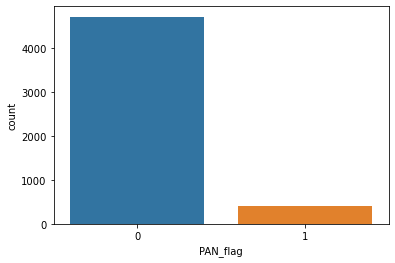

In [92]:
sns.countplot(x= 'PAN_flag', data=default)

In [93]:
default['PAN_flag'].value_counts()

0    4719
1     407
Name: PAN_flag, dtype: int64

## From the graph,  customers who shared PAN info are less among defaulted customers

## Hypothesis Test  

- Test whether the default proportion is lower for  customers who shared PAN

### One Sample Test of proportion @ 5% significance level

- H0: Default Proportion of P_PAN_shared= 0.5

- H1: Default Proportion of P_PAN_shared < 0.5

In [94]:
pd.crosstab(ln.PAN_flag,ln.Loan_Default,margins=True)

Loan_Default,0,1,All
PAN_flag,,,
0,16835,4719,21554
1,1354,407,1761
All,18189,5126,23315


In [95]:
P=0.5
x= 407
n= 5126

In [96]:
proportions_ztest(x,n,0.5,alternative='smaller')

(-111.38221857190048, 0.0)

### Since p value < alpha(0.05) --> reject H0

### We can conclude that default proportion of  customers who shared PAN is lower 

## 4) Plotting  'VoterID_flag' count plot among defaulted customers

<AxesSubplot:xlabel='VoterID_flag', ylabel='count'>

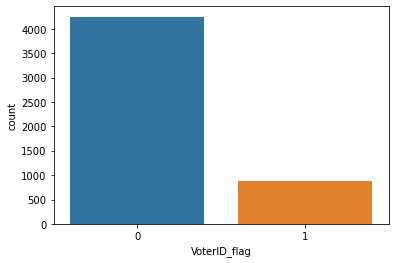

In [97]:
sns.countplot(x= 'VoterID_flag', data=default)

In [98]:
default['VoterID_flag'].value_counts()

0    4245
1     881
Name: VoterID_flag, dtype: int64

## From the graph,  customers who shared  VoterID info are less among defaulted customers

## Hypothesis Test  

- Test whether the default proportion is lower for  customers who shared  VoterID_flag

### One Sample Test of proportion @ 5% significance level

- H0: Default Proportion of P_VoterID_shared= 0.5

- H1: Default Proportion of P_VoterID_shared < 0.5

In [99]:
pd.crosstab(ln.VoterID_flag,ln.Loan_Default,margins=True)

Loan_Default,0,1,All
VoterID_flag,,,
0,15781,4245,20026
1,2408,881,3289
All,18189,5126,23315


In [100]:
P=0.5
x= 881
n= 5126

In [101]:
proportions_ztest(x,n,0.5,alternative='smaller')

(-62.27138009096419, 0.0)

### Since p value < alpha(0.05) --> reject H0

### We can conclude that default proportion of  customers who shared Voter_ID is lower 

## 5) Plotting  'Driving_flag' count plot among defaulted customers

<AxesSubplot:xlabel='Driving_flag', ylabel='count'>

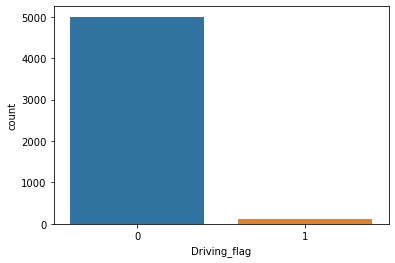

In [102]:
sns.countplot(x='Driving_flag', data=default)

In [103]:
default['Driving_flag'].value_counts()

0    5001
1     125
Name: Driving_flag, dtype: int64

## From the graph,  customers who shared  Driving Licence info are less among defaulted customers

## Hypothesis Test  

- Test whether the default proportion is lower for  customers who shared  Driving License

### One Sample Test of proportion @ 5% significance level

- H0: Default Proportion of P_DL_shared= 0.5

- H1: Default Proportion of P_DL_shared < 0.5

In [104]:
pd.crosstab(ln.Driving_flag,ln.Loan_Default,margins=True)

Loan_Default,0,1,All
Driving_flag,,,
0,17774,5001,22775
1,415,125,540
All,18189,5126,23315


In [105]:
P=0.5
x= 125
n= 5126

In [106]:
proportions_ztest(x,n,0.5,alternative='smaller')

(-220.76975131068394, 0.0)

### Since p value < alpha(0.05) --> reject H0

### We can conclude that default proportion of  customers who shared Driving License is lower 

In [107]:
ln.columns

Index(['Disbursed_Amount', 'Asset_Cost', 'ltv', 'Employment_Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'State_Name', 'Region_Name', 'City_Name',
       'Loan_Default', 'Age', 'CREDIT.HISTORY.LENGTH_in_months'],
      dtype='object')

## 6) Plotting  'Region_Name' count plot among defaulted customers

<AxesSubplot:xlabel='Region_Name', ylabel='count'>

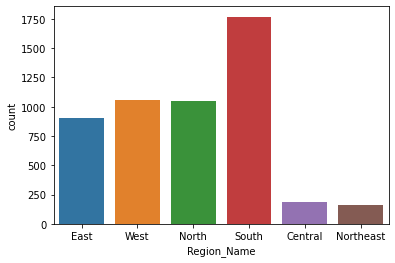

In [108]:
sns.countplot(x='Region_Name', data=default)

In [109]:
default['Region_Name'].value_counts()

South        1768
West         1058
North        1051
East          901
Central       183
Northeast     165
Name: Region_Name, dtype: int64

## From the graph,  customers from South region are high among defaulted customers

## Hypothesis Test  



### Chi Square test

- H0: There is no association or Independency b/w Region & default
    
- H1: There is an association/dependency b/w  Region & default

In [110]:
pd.crosstab(ln.Region_Name,ln.Loan_Default,margins=True)

Loan_Default,0,1,All
Region_Name,,,
Central,617,183,800
East,3105,901,4006
North,3751,1051,4802
Northeast,587,165,752
South,6247,1768,8015
West,3882,1058,4940
All,18189,5126,23315


In [111]:
table=pd.crosstab(ln.Region_Name,ln.Loan_Default,margins=True)

In [112]:
st.chi2_contingency(table)

(1.950450249026777,
 0.9994780879934325,
 12,
 array([[  624.11323183,   175.88676817,   800.        ],
        [ 3125.24700836,   880.75299164,  4006.        ],
        [ 3746.23967403,  1055.76032597,  4802.        ],
        [  586.66643792,   165.33356208,   752.        ],
        [ 6252.83444135,  1762.16555865,  8015.        ],
        [ 3853.89920652,  1086.10079348,  4940.        ],
        [18189.        ,  5126.        , 23315.        ]]))

### Since p value > alpha(0.05) --> accept H0

### We can conclude that there is no association between Region & default

In [113]:
ln.columns

Index(['Disbursed_Amount', 'Asset_Cost', 'ltv', 'Employment_Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'State_Name', 'Region_Name', 'City_Name',
       'Loan_Default', 'Age', 'CREDIT.HISTORY.LENGTH_in_months'],
      dtype='object')

## 7) Plotting  'State_Name' count plot among defaulted customers

<AxesSubplot:xlabel='State_Name', ylabel='count'>

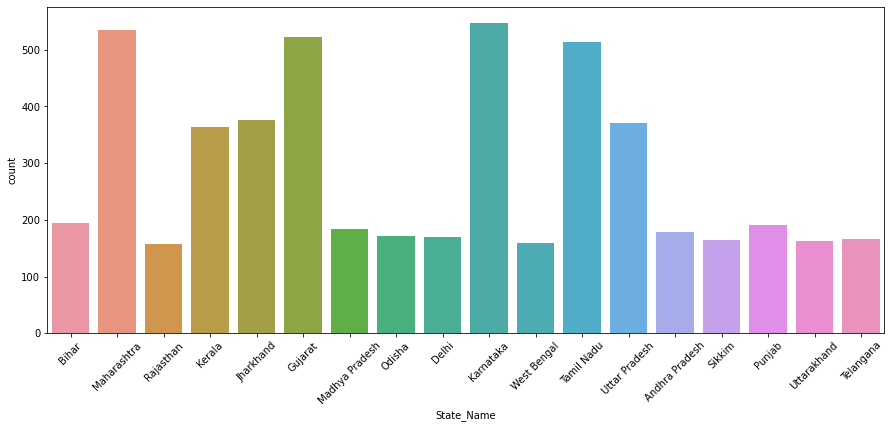

In [114]:
plt.figure(figsize= (15,6))
plt.xticks(rotation=45)
sns.countplot(x='State_Name', data=default)

In [115]:
default['State_Name'].value_counts()

Karnataka         548
Maharashtra       535
Gujarat           523
Tamil Nadu        513
Jharkhand         377
Uttar Pradesh     370
Kerala            363
Bihar             194
Punjab            191
Madhya Pradesh    183
Andhra Pradesh    178
Odisha            171
Delhi             169
Telangana         166
Sikkim            165
Uttarakhand       163
West Bengal       159
Rajasthan         158
Name: State_Name, dtype: int64

## From the graph,  customers from Karnataka, Maharshtra, Gujarat & TN are high among defaulted customers

## Hypothesis Test  



### Chi Square test

- H0: There is no association or Independency b/w State_Name & default
    
- H1: There is an association/dependency b/w  State_Name & default

In [116]:
pd.crosstab(ln.State_Name,ln.Loan_Default,margins=True)

Loan_Default,0,1,All
State_Name,,,
Andhra Pradesh,574,178,752
Bihar,608,194,802
Delhi,608,169,777
Gujarat,1935,523,2458
Jharkhand,1217,377,1594
Karnataka,1944,548,2492
Kerala,1251,363,1614
Madhya Pradesh,617,183,800
Maharashtra,1947,535,2482


In [117]:
table=pd.crosstab(ln.State_Name,ln.Loan_Default,margins=True)

In [118]:
st.chi2_contingency(table)

(14.678717235673476,
 0.9993796612805954,
 36,
 array([[  586.66643792,   165.33356208,   752.        ],
        [  625.6735149 ,   176.3264851 ,   802.        ],
        [  606.16997641,   170.83002359,   777.        ],
        [ 1917.58790478,   540.41209522,  2458.        ],
        [ 1243.54561441,   350.45438559,  1594.        ],
        [ 1944.11271713,   547.88728287,  2492.        ],
        [ 1259.14844521,   354.85155479,  1614.        ],
        [  624.11323183,   175.88676817,   800.        ],
        [ 1936.31130174,   545.68869826,  2482.        ],
        [  656.8791765 ,   185.1208235 ,   842.        ],
        [  647.51747802,   182.48252198,   830.        ],
        [  616.31181643,   173.68818357,   790.        ],
        [  586.66643792,   165.33356208,   752.        ],
        [ 1855.1765816 ,   522.8234184 ,  2378.        ],
        [  607.73025949,   171.26974051,   779.        ],
        [ 1254.46759597,   353.53240403,  1608.        ],
        [  621.77280721, 

### Since p value > alpha(0.05) --> accept H0

### We can conclude that there is no association between State_Name & default

In [119]:
ln.columns

Index(['Disbursed_Amount', 'Asset_Cost', 'ltv', 'Employment_Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'State_Name', 'Region_Name', 'City_Name',
       'Loan_Default', 'Age', 'CREDIT.HISTORY.LENGTH_in_months'],
      dtype='object')

## Result (Categorical columns) : We can remove State_Name, Region_Name from the data since they are not statistically relevant for analysing default among customers (City_Name is already ruled out because of high number of sub-categories)

In [120]:
ln.drop(['State_Name', 'Region_Name', 'City_Name'], axis=1, inplace=True)
ln.shape

(23315, 14)

In [121]:
ln.columns

Index(['Disbursed_Amount', 'Asset_Cost', 'ltv', 'Employment_Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'Loan_Default', 'Age',
       'CREDIT.HISTORY.LENGTH_in_months'],
      dtype='object')

In [122]:
num_cols

['Disbursed_Amount',
 'Asset_Cost',
 'ltv',
 'PERFORM_CNS.SCORE',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'Age',
 'CREDIT.HISTORY.LENGTH_in_months']

## 8) Testing whether Disbursed amount is different among defaulted and non-defaulted customers

In [123]:
ln.head(6)

,Disbursed_Amount,Asset_Cost,ltv,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Loan_Default,Age,CREDIT.HISTORY.LENGTH_in_months
0,36439,65850,56.19,Self employed,1,0,0,0,0,0,0,0,28.0,0.0
1,48749,69303,72.15,Salaried,1,0,0,0,783,0,0,0,28.0,30.0
2,55348,66340,85.00,Self employed,1,0,0,0,0,0,0,1,25.0,0.0
3,48849,64133,77.96,Self employed,1,0,0,0,0,0,0,0,30.0,0.0
4,40394,59386,70.72,Self employed,1,0,0,0,14,1,1,0,44.0,37.0
5,51803,67466,79.30,Self employed,1,0,0,0,300,0,0,0,54.0,182.0


In [124]:
dis_def= ln[ln['Loan_Default']==1]['Disbursed_Amount']
dis_nondef= ln[ln['Loan_Default']==0]['Disbursed_Amount']

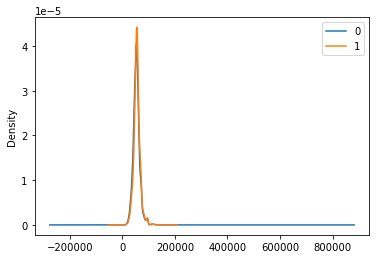

In [125]:
ln.groupby('Loan_Default')['Disbursed_Amount'].plot.density(legend=True);

In [126]:
ln.groupby('Loan_Default')['Disbursed_Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Default,,,,,,,,
0,18189.0,53862.158667,13322.107774,13600.0,46349.00,53303.0,60047.0,592460.0
1,5126.0,55842.926844,11967.380881,13369.0,49150.75,55259.0,61459.0,144085.0


In [127]:
# Test of Normality for both default disbursed amount and non-default disbursed amount

In [128]:
st.shapiro(dis_def)

ShapiroResult(statistic=0.9598407745361328, pvalue=1.838228078705686e-35)

In [129]:
st.shapiro(dis_nondef)

ShapiroResult(statistic=0.8818107843399048, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution

- hence we proceed for non parametric test

## Mann Whitney U test

Ho: pop median_dis_def = pop median_dis_nondef
    
H1:  pop median_dis_def != pop median_dis_nondef

In [130]:
st.mannwhitneyu(dis_def,dis_nondef,alternative='two-sided')

MannwhitneyuResult(statistic=51816123.5, pvalue=2.684428148082526e-34)

### Since p value < alpha(0.05) --> reject H0;

### Hence we can conclude that the disbursed amount median for defaulted and non-defaulted customers are not same. 

## Mann Whitney U test (single tailed)

Ho: pop median_dis_def = pop median_dis_nondef
    
H1:  pop median_dis_def > pop median_dis_nondef

In [131]:
st.mannwhitneyu(dis_def,dis_nondef,alternative='greater')

MannwhitneyuResult(statistic=51816123.5, pvalue=1.342214074041263e-34)

### Since p value < alpha(0.05) --> reject H0;

### Hence we can conclude that median disbursed amount for defaulted customers is greater than that of non-defaulted customers

## 9) Testing whether Asset cost is different among defaulted and non-defaulted customers

In [132]:
ln.head(1)

,Disbursed_Amount,Asset_Cost,ltv,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Loan_Default,Age,CREDIT.HISTORY.LENGTH_in_months
0,36439,65850,56.19,Self employed,1,0,0,0,0,0,0,0,28.0,0.0


In [133]:
asset_def= ln[ln['Loan_Default']==1]['Asset_Cost']
asset_nondef= ln[ln['Loan_Default']==0]['Asset_Cost']

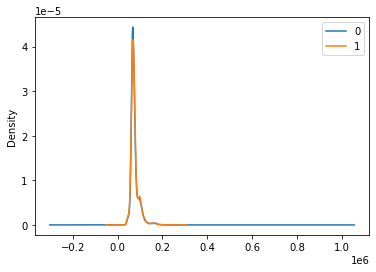

In [134]:
ln.groupby('Loan_Default')['Asset_Cost'].plot.density(legend=True);

In [135]:
ln.groupby('Loan_Default')['Asset_Cost'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Default,,,,,,,,
0,18189.0,75816.629336,19116.147311,37230.0,65600.00,70862.0,79365.00,715186.0
1,5126.0,75932.856613,18530.131894,38055.0,65736.25,71200.0,79302.75,218573.0


In [136]:
# Test of Normality for both default asset cost and non-default asset cost

In [137]:
st.shapiro(asset_def)

ShapiroResult(statistic=0.7964711785316467, pvalue=0.0)

In [138]:
st.shapiro(asset_nondef)

ShapiroResult(statistic=0.7457393407821655, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution

- hence we proceed for non parametric test

## Mann Whitney U test (two-sided)

Ho: pop median_asset_def = pop median_asset_nondef
    
H1:  pop median_asset_def != pop median_asset_nondef

In [139]:
st.mannwhitneyu(asset_def,asset_nondef,alternative='two-sided')

MannwhitneyuResult(statistic=47033149.5, pvalue=0.32984608588998177)

### Since p value > alpha(0.05) --> accept H0;

### Hence we can conclude that median asset cost is not different for defaulted and non-defaulted customers

## 10) Testing whether  'ltv' is different among defaulted and non-defaulted customers

In [140]:
ln.head(1)

,Disbursed_Amount,Asset_Cost,ltv,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Loan_Default,Age,CREDIT.HISTORY.LENGTH_in_months
0,36439,65850,56.19,Self employed,1,0,0,0,0,0,0,0,28.0,0.0


In [141]:
ltv_def= ln[ln['Loan_Default']==1]['ltv']
ltv_nondef= ln[ln['Loan_Default']==0]['ltv']

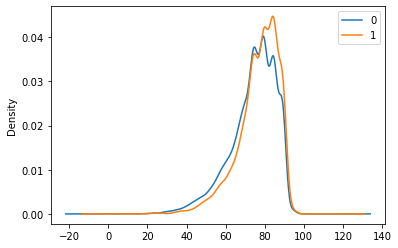

In [142]:
ln.groupby('Loan_Default')['ltv'].plot.density(legend=True);

In [143]:
ln.groupby('Loan_Default')['ltv'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Default,,,,,,,,
0,18189.0,74.120954,11.683547,17.13,68.0600,75.89,83.08,94.98
1,5126.0,76.761984,10.384499,22.67,71.6625,78.99,84.62,94.93


In [144]:
# Test of Normality for both default ltv and non-default ltv

In [145]:
st.shapiro(ltv_def)

ShapiroResult(statistic=0.9193670749664307, pvalue=0.0)

In [146]:
st.shapiro(ltv_nondef)

ShapiroResult(statistic=0.9340162873268127, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution

- hence we proceed for non parametric test

## Mann Whitney U test (one-sided)

Ho: pop median_ltv_def = pop median_ltv_nondef
    
H1: pop median_ltv_def > pop median_ltv_nondef

In [147]:
st.mannwhitneyu(ltv_def,ltv_nondef,alternative='greater')

MannwhitneyuResult(statistic=52869186.0, pvalue=3.959248644259283e-49)

### Since p value < alpha(0.05) --> reject H0;

### Hence we can conclude that median ltv is higher for defaulted compared to non-defaulted customers

## 11) Testing whether  'PERFORM_CNS.SCORE'  is different among defaulted and non-defaulted customers

In [148]:
ln.head(1)

,Disbursed_Amount,Asset_Cost,ltv,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Loan_Default,Age,CREDIT.HISTORY.LENGTH_in_months
0,36439,65850,56.19,Self employed,1,0,0,0,0,0,0,0,28.0,0.0


In [149]:
pscore_def= ln[ln['Loan_Default']==1]['PERFORM_CNS.SCORE']
pscore_nondef= ln[ln['Loan_Default']==0]['PERFORM_CNS.SCORE']

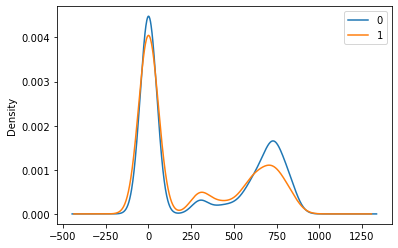

In [150]:
ln.groupby('Loan_Default')['PERFORM_CNS.SCORE'].plot.density(legend=True);

In [151]:
ln.groupby('Loan_Default')['PERFORM_CNS.SCORE'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Default,,,,,,,,
0,18189.0,302.166584,343.374444,0.0,0.0,15.0,691.0,890.0
1,5126.0,252.445377,317.568595,0.0,0.0,0.0,608.0,870.0


In [152]:
# Test of Normality for both default and non default Perform_CNS_score

In [153]:
st.shapiro(pscore_def)

ShapiroResult(statistic=0.7278894186019897, pvalue=0.0)

In [154]:
st.shapiro(pscore_nondef)

ShapiroResult(statistic=0.7330706119537354, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution

- hence we proceed for non parametric test

## Mann Whitney U test (one-sided)

Ho: pop median_pscore_def = pop median_pscore_nondef
    
H1:pop median_pscore_def < pop median_pscore_nondef

In [155]:
st.mannwhitneyu(pscore_def,pscore_nondef,alternative='less')

MannwhitneyuResult(statistic=42893246.5, pvalue=4.088457639318499e-21)

### Since p value < alpha(0.05) --> reject H0;

### Hence we can conclude that median perform_score is lower for defaulted compared to non-defaulted customers

## 12) Testing whether  'Age' is different among defaulted and non-defaulted customers

In [156]:
ln.head(1)

,Disbursed_Amount,Asset_Cost,ltv,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Loan_Default,Age,CREDIT.HISTORY.LENGTH_in_months
0,36439,65850,56.19,Self employed,1,0,0,0,0,0,0,0,28.0,0.0


In [157]:
age_def= ln[ln['Loan_Default']==1]['Age']
age_nondef= ln[ln['Loan_Default']==0]['Age']

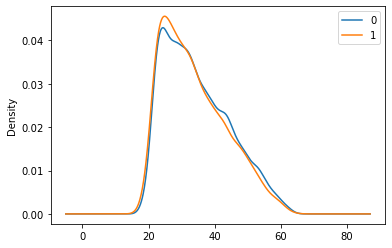

In [158]:
ln.groupby('Loan_Default')['Age'].plot.density(legend=True);

In [159]:
ln.groupby('Loan_Default')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Default,,,,,,,,
0,18189.0,34.661884,9.894658,18.0,26.0,33.0,42.0,64.0
1,5126.0,33.821693,9.643692,18.0,26.0,32.0,40.0,64.0


In [160]:
# Test of Normality for both default and non default Age

In [161]:
st.shapiro(age_def)

ShapiroResult(statistic=0.9466264843940735, pvalue=1.271585870676126e-39)

In [162]:
st.shapiro(age_nondef)

ShapiroResult(statistic=0.9521210789680481, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution

- hence we proceed for non parametric test

## Mann Whitney U test (one-sided)

Ho: pop median_age_def = pop median_age_nondef
    
H1:pop median_age_def < pop median_age_nondef

In [163]:
st.mannwhitneyu(age_def,age_nondef,alternative='less')

MannwhitneyuResult(statistic=44359034.0, pvalue=5.443489660770644e-08)

### Since p value < alpha(0.05) --> reject H0;

### Hence we can conclude that median age is lower for defaulted compared to non-defaulted customers

## 13) Testing whether  'CREDIT.HISTORY.LENGTH_in_months' is different among defaulted and non-defaulted customers

In [164]:
ln.head(1)

,Disbursed_Amount,Asset_Cost,ltv,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Loan_Default,Age,CREDIT.HISTORY.LENGTH_in_months
0,36439,65850,56.19,Self employed,1,0,0,0,0,0,0,0,28.0,0.0


In [165]:
cred_def= ln[ln['Loan_Default']==1]['CREDIT.HISTORY.LENGTH_in_months']
cred_nondef= ln[ln['Loan_Default']==0]['CREDIT.HISTORY.LENGTH_in_months']

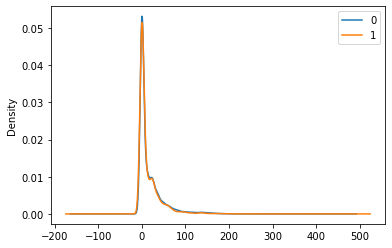

In [166]:
ln.groupby('Loan_Default')['CREDIT.HISTORY.LENGTH_in_months'].plot.density(legend=True);

In [167]:
ln.groupby('Loan_Default')['CREDIT.HISTORY.LENGTH_in_months'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Default,,,,,,,,
0,18189.0,16.879378,29.213602,0.0,0.0,0.0,24.0,328.0
1,5126.0,14.044089,25.612604,0.0,0.0,0.0,21.0,349.0


In [168]:
# Test of Normality for both default and non default 'CREDIT.HISTORY.LENGTH_in_months'

In [169]:
st.shapiro(cred_def)

ShapiroResult(statistic=0.6063653230667114, pvalue=0.0)

In [170]:
st.shapiro(cred_nondef)

ShapiroResult(statistic=0.63382887840271, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution

- hence we proceed for non parametric test

## Mann Whitney U test (one-sided)

Ho: pop median_cred_def = pop median_cred_nondef
    
H1:pop median_cred_def < pop median_cred_nondef

In [171]:
st.mannwhitneyu(cred_def,cred_nondef,alternative='less')

MannwhitneyuResult(statistic=44177198.5, pvalue=3.6657739767096523e-10)

### Since p value < alpha(0.05) --> reject H0;

### Hence we can conclude that median credit_history.length is lower for defaulted compared to non-defaulted customers

## 14) Testing whether  'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS' is different among defaulted and non-defaulted customers

In [172]:
ln.head(1)

,Disbursed_Amount,Asset_Cost,ltv,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Loan_Default,Age,CREDIT.HISTORY.LENGTH_in_months
0,36439,65850,56.19,Self employed,1,0,0,0,0,0,0,0,28.0,0.0


In [173]:
delinq_def= ln[ln['Loan_Default']==1]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']
delinq_nondef= ln[ln['Loan_Default']==0]['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS']

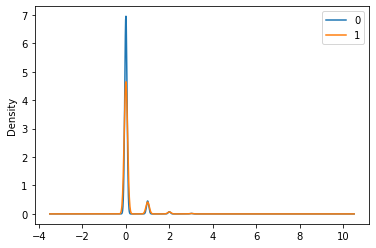

In [174]:
ln.groupby('Loan_Default')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].plot.density(legend=True);

In [175]:
ln.groupby('Loan_Default')['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Default,,,,,,,,
0,18189.0,0.093958,0.377101,0.0,0.0,0.0,0.0,7.0
1,5126.0,0.124268,0.426864,0.0,0.0,0.0,0.0,7.0


In [176]:
# Test of Normality for both default and non default 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'

In [177]:
st.shapiro(delinq_def)

ShapiroResult(statistic=0.31853049993515015, pvalue=0.0)

In [178]:
st.shapiro(delinq_nondef)

ShapiroResult(statistic=0.26472389698028564, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution

- hence we proceed for non parametric test

## Mann Whitney U test (one-sided)

Ho: pop median_delinq_def = pop median_delinq_nondef
    
H1:pop median_delinq_def > pop median_delinq_nondef

In [179]:
st.mannwhitneyu(delinq_def,delinq_nondef,alternative='greater')

MannwhitneyuResult(statistic=47758568.5, pvalue=5.862829082447592e-09)

### Since p value < alpha(0.05) --> reject H0;

### Hence we can conclude that median delinq.accounts is higher for defaulted compared to non-defaulted customers

## 15) Testing whether  'NO.OF_INQUIRIES' is different among defaulted and non-defaulted customers

In [180]:
ln.head(1)

,Disbursed_Amount,Asset_Cost,ltv,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Loan_Default,Age,CREDIT.HISTORY.LENGTH_in_months
0,36439,65850,56.19,Self employed,1,0,0,0,0,0,0,0,28.0,0.0


In [181]:
inq_def= ln[ln['Loan_Default']==1]['NO.OF_INQUIRIES']
inq_nondef= ln[ln['Loan_Default']==0]['NO.OF_INQUIRIES']

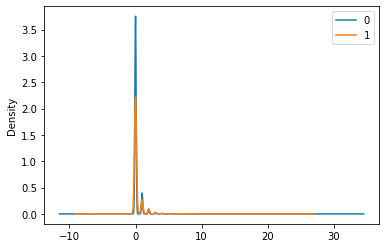

In [182]:
ln.groupby('Loan_Default')['NO.OF_INQUIRIES'].plot.density(legend=True);

In [183]:
ln.groupby('Loan_Default')['NO.OF_INQUIRIES'].describe()

,count,mean,std,min,25%,50%,75%,max
Loan_Default,,,,,,,,
0,18189.0,0.190170,0.654416,0.0,0.0,0.0,0.0,23.0
1,5126.0,0.261217,0.839423,0.0,0.0,0.0,0.0,18.0


In [184]:
# Test of Normality for both default and non default 'NO.OF_INQUIRIES'

In [185]:
st.shapiro(inq_def)

ShapiroResult(statistic=0.3416135311126709, pvalue=0.0)

In [186]:
st.shapiro(inq_nondef)

ShapiroResult(statistic=0.31242692470550537, pvalue=0.0)

## Since p values for both are less than alpha (0.05)--> both populations are not following normal distribution

- hence we proceed for non parametric test

## Mann Whitney U test (one-sided)

Ho: pop median_inq_def = pop median_inq_nondef
    
H1: pop median_inq_def > pop median_inq_nondef

In [187]:
st.mannwhitneyu(inq_def,inq_nondef,alternative='greater')

MannwhitneyuResult(statistic=47925604.5, pvalue=9.93949907632717e-08)

### Since p value < alpha(0.05) --> reject H0;

### Hence we can conclude that median no: of inquiries is higher for defaulted compared to non-defaulted customers

In [188]:
ln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23315 entries, 0 to 23314
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Disbursed_Amount                     23315 non-null  int64  
 1   Asset_Cost                           23315 non-null  int64  
 2   ltv                                  23315 non-null  float64
 3   Employment_Type                      23315 non-null  object 
 4   Aadhar_flag                          23315 non-null  int64  
 5   PAN_flag                             23315 non-null  int64  
 6   VoterID_flag                         23315 non-null  int64  
 7   Driving_flag                         23315 non-null  int64  
 8   PERFORM_CNS.SCORE                    23315 non-null  int64  
 9   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  23315 non-null  int64  
 10  NO.OF_INQUIRIES                      23315 non-null  int64  
 11  Loan_Default                

In [189]:
loan= ln.copy()

In [190]:
data= ln.copy()

In [191]:
def transformation(df,val):
    df[val+'_sqroot']=np.sqrt(df[val])
    df[val+'_square']=(df[val])**2
    if df[df[val]==0][val].count()==0:
        df[val+'_log']=np.log(df[val])      
            
    df[val+'_cuberoot']=np.cbrt(df[val])
    plt.figure(figsize=(18,10))
    plt.subplot(2,3,1)
    df[val].plot(kind='hist')
    plt.title('Original' + "-"+ val+ " Feature")
    plt.subplot(2,3,2)
    df[val+'_sqroot'].plot(kind='hist')
    plt.title('Sqroot'+ "-"+ val+ " Feature")
    plt.subplot(2,3,3)
    df[val+'_square'].plot(kind='hist')
    plt.title('Square'+ "-"+ val+ " Feature")
    
    if df[df[val]==0][val].count()==0:
        plt.subplot(2,3,4)
        df[val+'_log'].plot(kind='hist')
        plt.title('Log'+ "-"+ val+ " Feature")
            
    plt.subplot(2,3,5)
    df[val+'_cuberoot'].plot(kind='hist')
    plt.title('Cuberoot'+ "-"+ val+ " Feature")
    plt.show()

In [192]:
#No: of Outliers (IQR Method) function

def outlier_num(df,val):
    IQR = df[val].quantile(0.75) - df[val].quantile(0.25)
    upperlimit = df[val].quantile(0.75) + 1.5* IQR # q3 + 1.5IQR
    lowerlimit = df[val].quantile(0.25) - 1.5* IQR # q1- 1.5 IQR
    outliers = df[(df[val]<lowerlimit) | (df[val]> upperlimit)][val].count()
    return outliers

In [193]:
# Creating function to check for outliers 
def transformation_box(df,val):
    df[val+'_sqroot']=np.sqrt(df[val])
    df[val+'_square']=(df[val])**2
    df[val+'_log']=np.log(df[val])
    df[val+'_cuberoot']=np.cbrt(df[val])
    plt.figure(figsize=(18,10))
    plt.subplot(2,3,1)
    df[val].plot(kind='box')
    plt.title('Original'+ "-"+ val+ " Feature")
    plt.subplot(2,3,2)
    df[val+'_sqroot'].plot(kind='box')
    plt.title('Sqroot'+ "-"+ val+ " Feature")
    plt.subplot(2,3,3)
    df[val+'_square'].plot(kind='box')
    plt.title('Square'+ "-"+ val+ " Feature")
    plt.subplot(2,3,4)
    df[val+'_log'].plot(kind='box')
    plt.title('Log'+ "-"+ val+ " Feature")
    plt.subplot(2,3,5)
    df[val+'_cuberoot'].plot(kind='box')
    plt.title('Cuberoot'+ "-"+ val+ " Feature")
    plt.show()
    print("No: of outliers for Original ",val,":", outlier_num(df,val))
    print("No: of outliers for Sqroot ",val,":", outlier_num(df,val+'_sqroot'))
    print("No: of outliers for Square ",val,":", outlier_num(df,val+'_square'))
    print("No: of outliers for Log  ",val,":", outlier_num(df,val+'_log'))
    print("No: of outliers for Cuberoot ",val,":", outlier_num(df,val+'_cuberoot'))
    

In [194]:
num_cols

['Disbursed_Amount',
 'Asset_Cost',
 'ltv',
 'PERFORM_CNS.SCORE',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'Age',
 'CREDIT.HISTORY.LENGTH_in_months']

In [195]:
data.columns

Index(['Disbursed_Amount', 'Asset_Cost', 'ltv', 'Employment_Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'Loan_Default', 'Age',
       'CREDIT.HISTORY.LENGTH_in_months'],
      dtype='object')

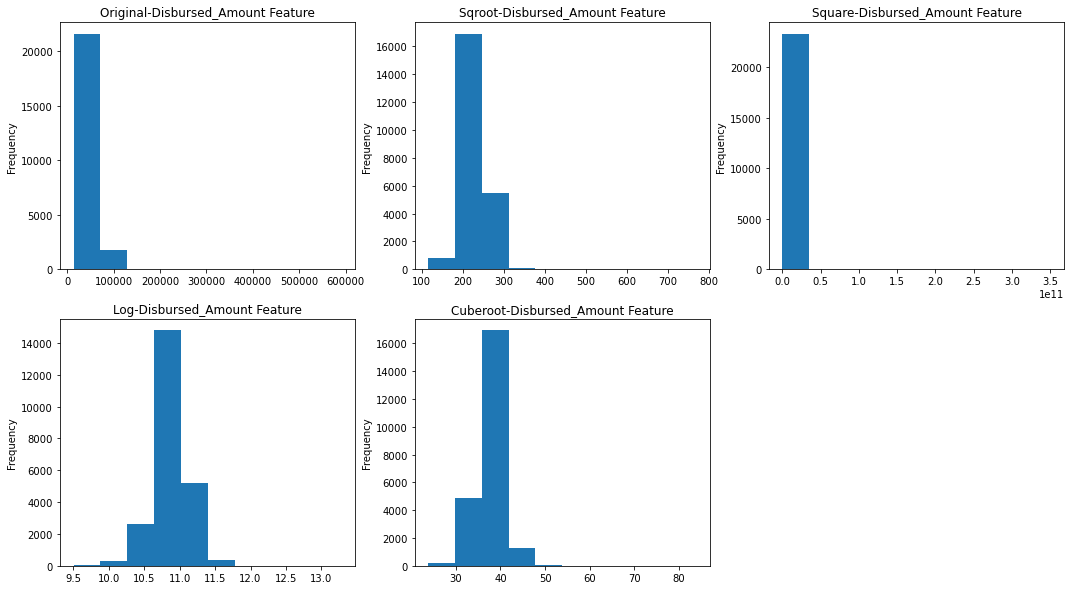

In [196]:
transformation(data,'Disbursed_Amount')

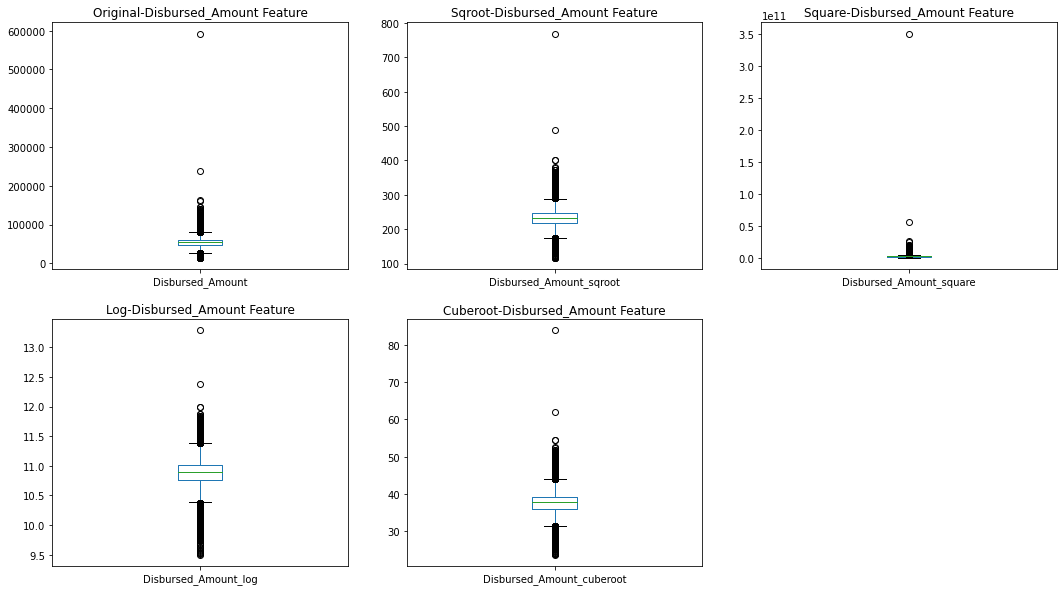

No: of outliers for Original  Disbursed_Amount : 943
No: of outliers for Sqroot  Disbursed_Amount : 1003
No: of outliers for Square  Disbursed_Amount : 979
No: of outliers for Log   Disbursed_Amount : 1146
No: of outliers for Cuberoot  Disbursed_Amount : 1050


In [197]:
transformation_box(data,'Disbursed_Amount')

### Result: Select Log transformation for "disbursed_amount" feature since it converts original skewed data to a slightly normalised distribution

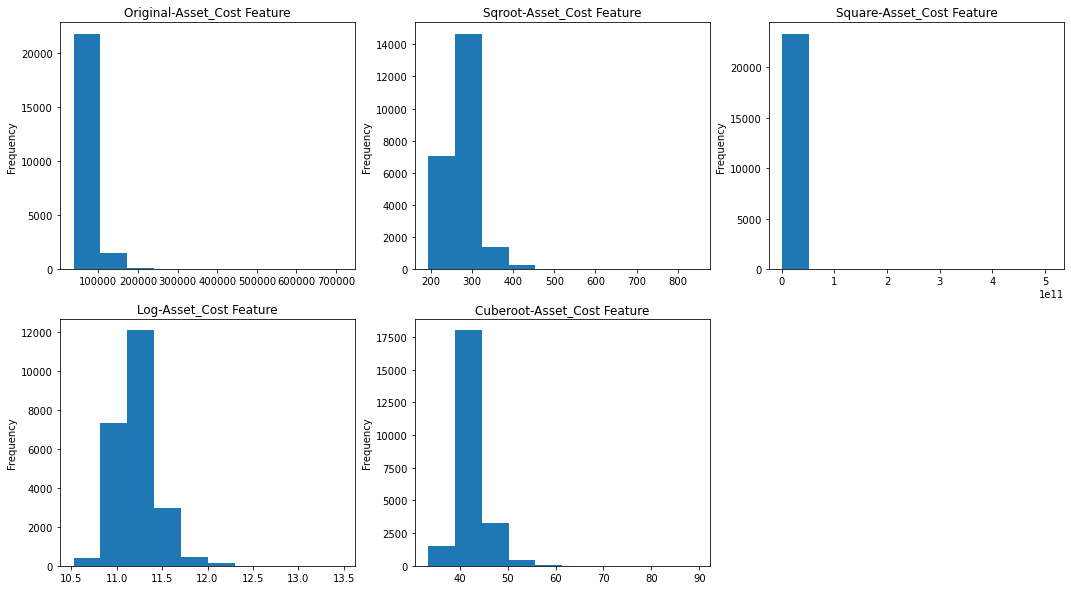

In [198]:
transformation(data,'Asset_Cost')

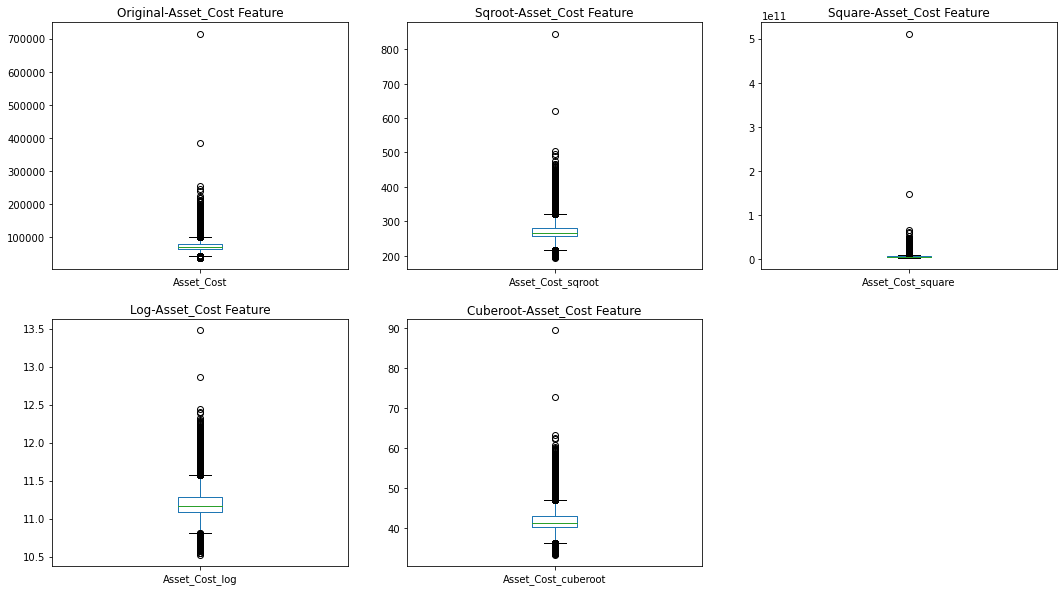

No: of outliers for Original  Asset_Cost : 2349
No: of outliers for Sqroot  Asset_Cost : 2141
No: of outliers for Square  Asset_Cost : 2757
No: of outliers for Log   Asset_Cost : 1912
No: of outliers for Cuberoot  Asset_Cost : 2068


In [199]:
transformation_box(data,'Asset_Cost')

### Result: Select Log transformation for "Asset_Cost" feature since it converts original skewed data to a slightly normalised distribution and number of outliers decreases 

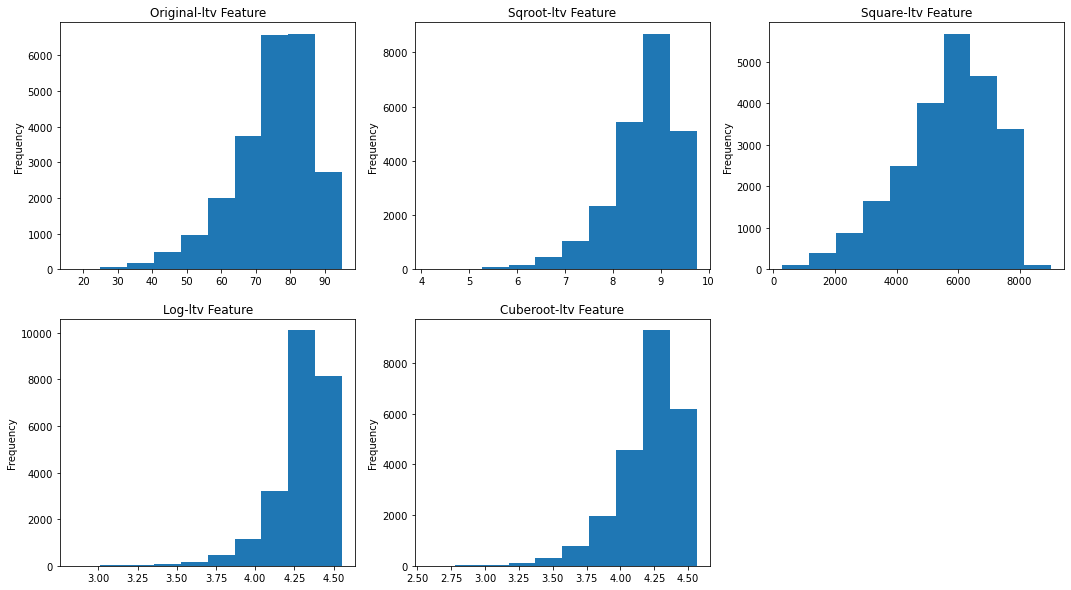

In [200]:
transformation(data,'ltv')

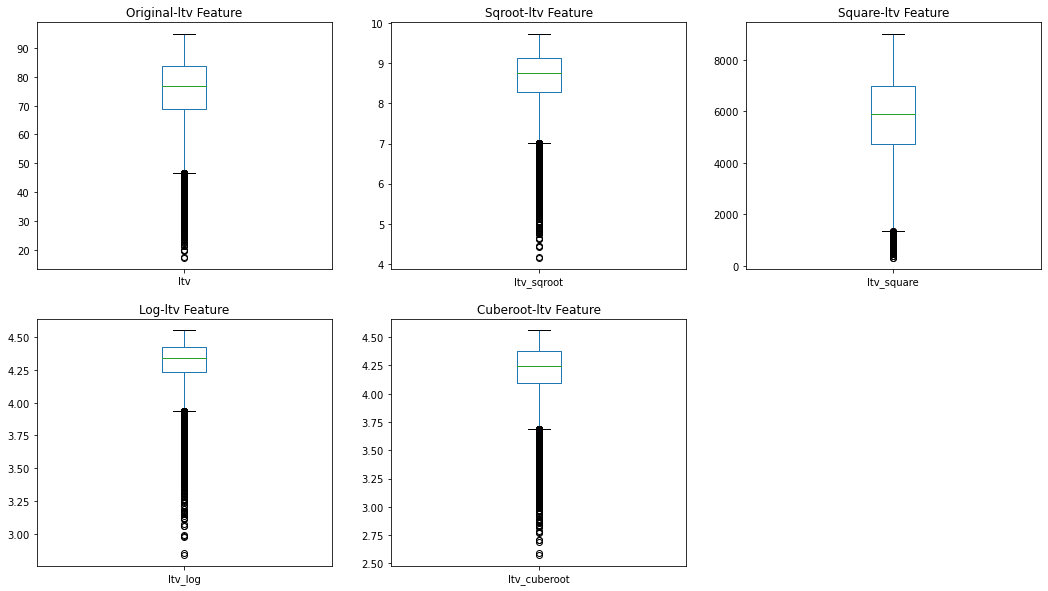

No: of outliers for Original  ltv : 618
No: of outliers for Sqroot  ltv : 848
No: of outliers for Square  ltv : 164
No: of outliers for Log   ltv : 1054
No: of outliers for Cuberoot  ltv : 916


In [201]:
transformation_box(data,'ltv')

### Result: Select square transformation for "ltv" feature since the number of outliers decreases 

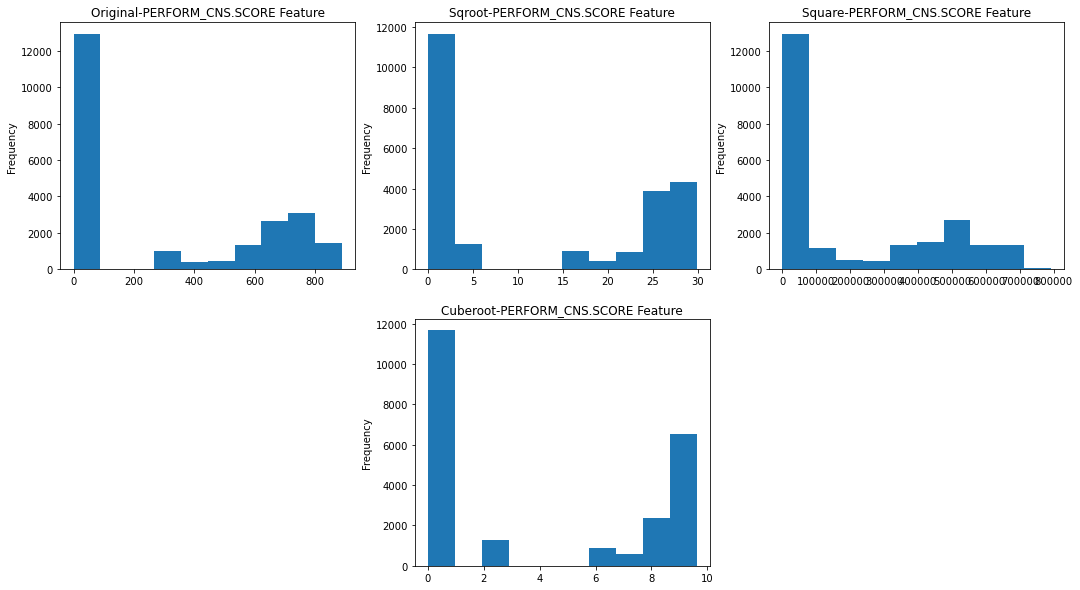

In [202]:
transformation(data,'PERFORM_CNS.SCORE')

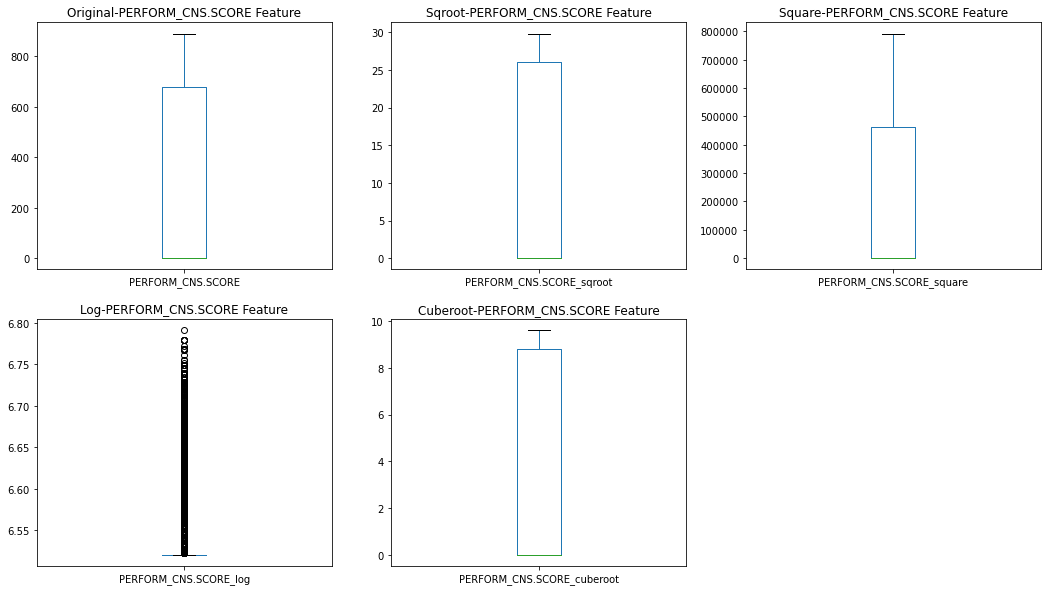

No: of outliers for Original  PERFORM_CNS.SCORE : 0
No: of outliers for Sqroot  PERFORM_CNS.SCORE : 0
No: of outliers for Square  PERFORM_CNS.SCORE : 0
No: of outliers for Log   PERFORM_CNS.SCORE : 0
No: of outliers for Cuberoot  PERFORM_CNS.SCORE : 0


In [203]:
transformation_box(data,'PERFORM_CNS.SCORE')

### Result: No transformation required for "Perform_CNS_Score" feature since outlier number is zero

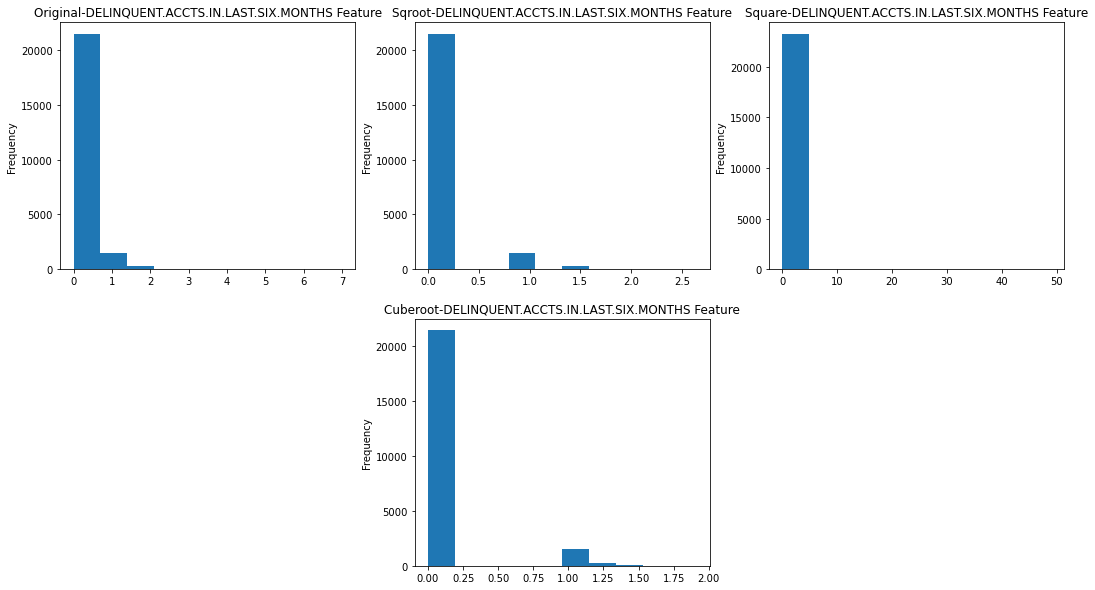

In [204]:
transformation(data,'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS')

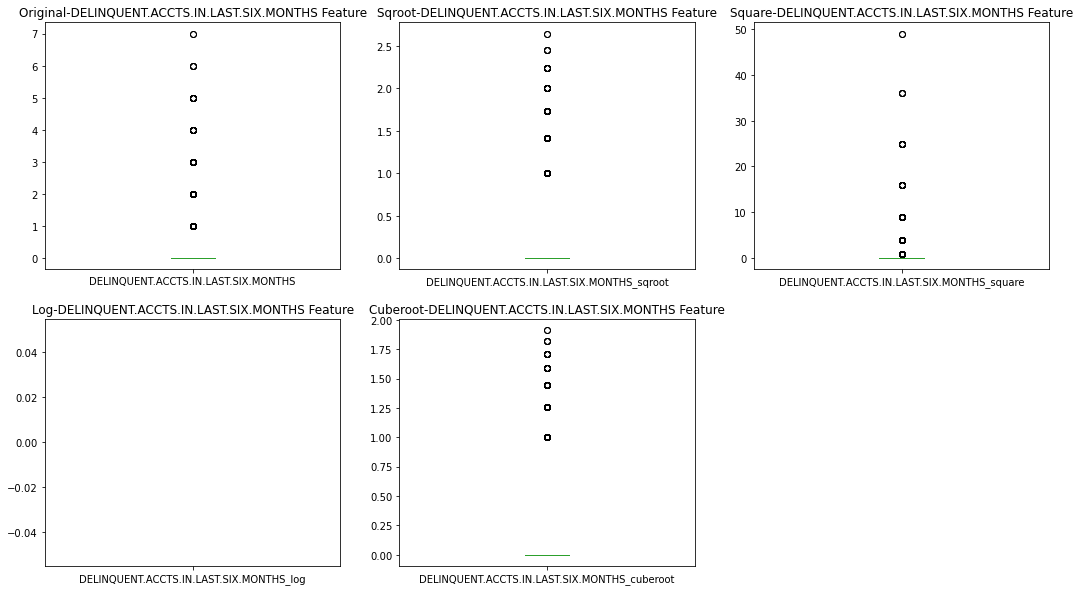

No: of outliers for Original  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS : 1861
No: of outliers for Sqroot  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS : 1861
No: of outliers for Square  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS : 1861
No: of outliers for Log   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS : 0
No: of outliers for Cuberoot  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS : 1861


In [205]:
transformation_box(data, 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS')

### Result: No transformation required for "Delinq.accnts" feature since outlier number is not changing

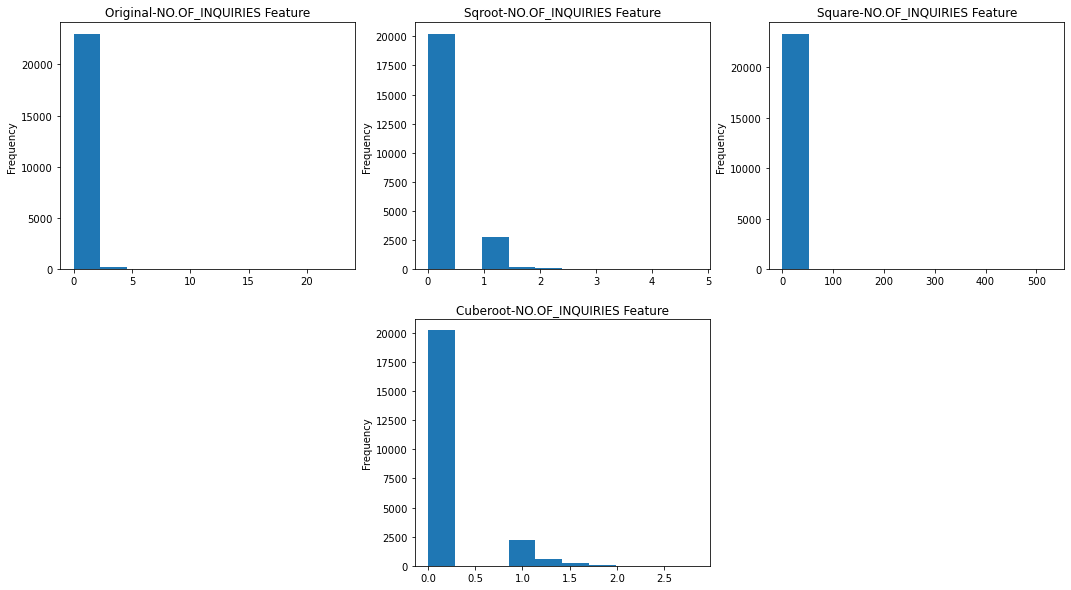

In [206]:
transformation(data,'NO.OF_INQUIRIES')

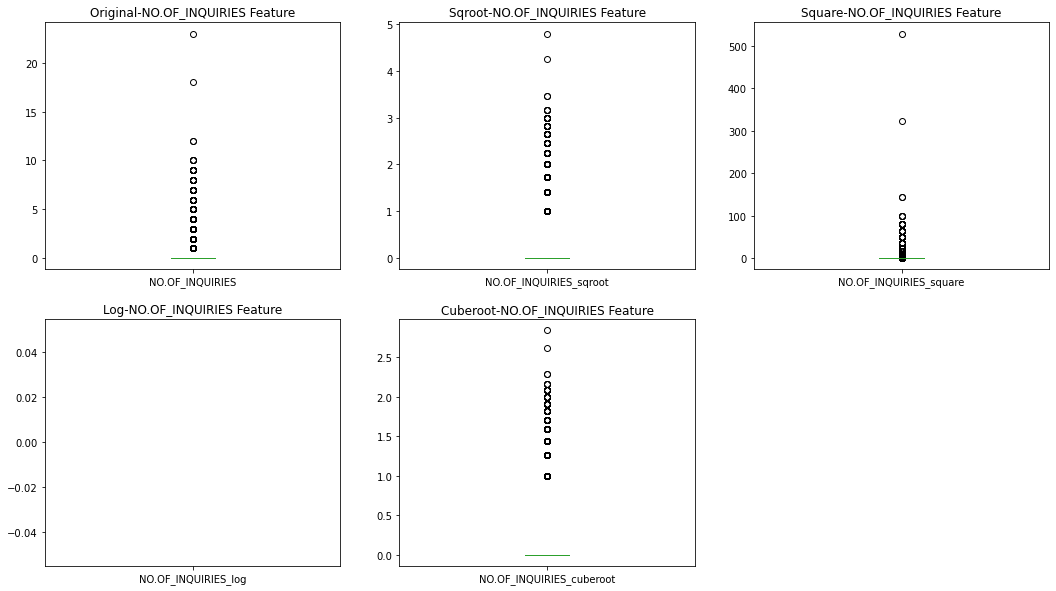

No: of outliers for Original  NO.OF_INQUIRIES : 3115
No: of outliers for Sqroot  NO.OF_INQUIRIES : 3115
No: of outliers for Square  NO.OF_INQUIRIES : 3115
No: of outliers for Log   NO.OF_INQUIRIES : 0
No: of outliers for Cuberoot  NO.OF_INQUIRIES : 3115


In [207]:
transformation_box(data, 'NO.OF_INQUIRIES')

### Result: No transformation required for "No: of inquiries" feature since outlier number is not changing

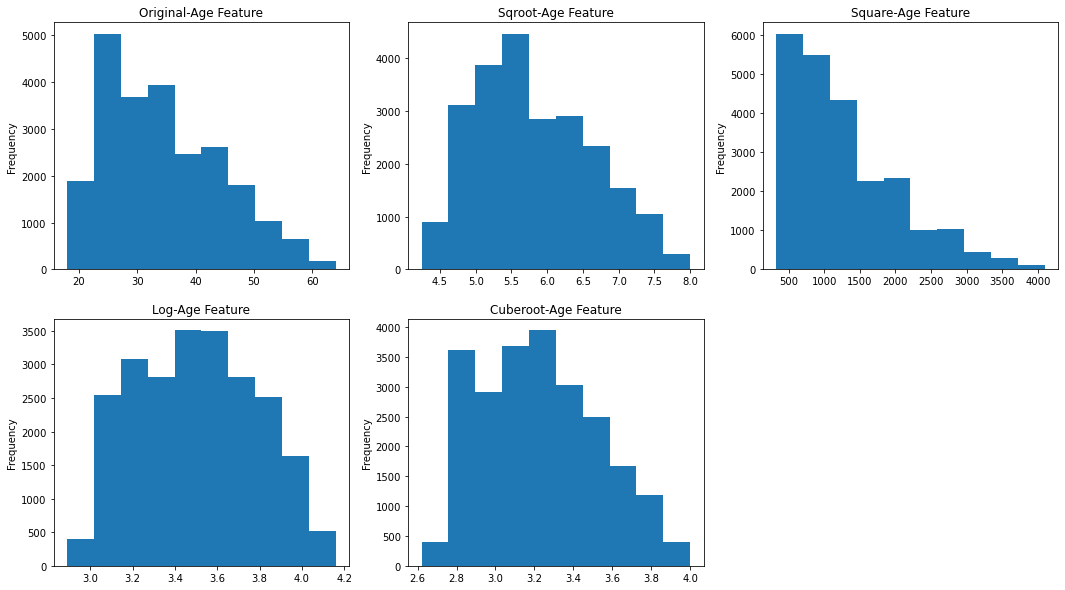

In [208]:
transformation(data,'Age')

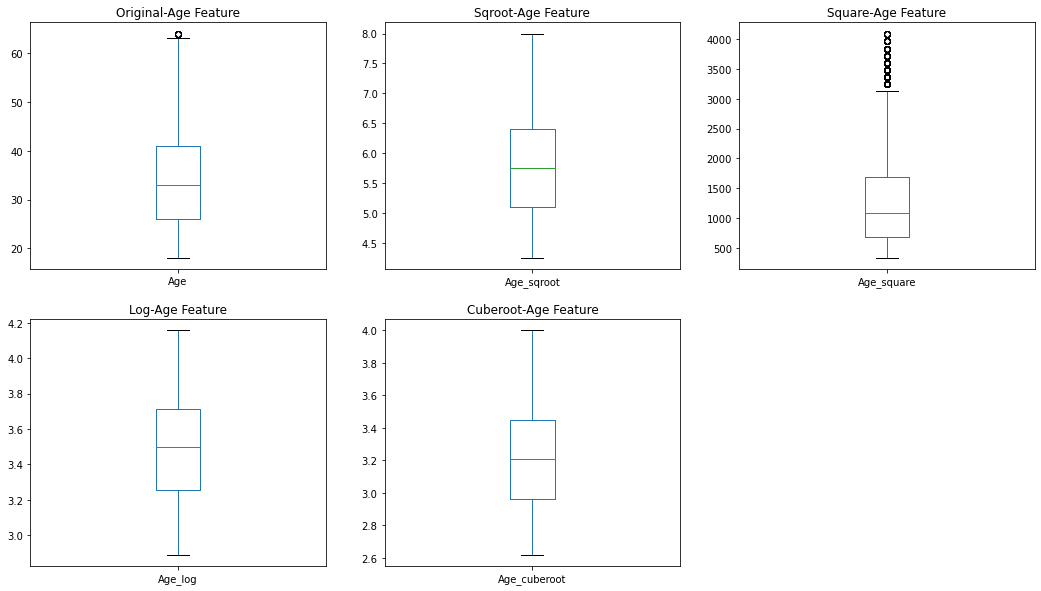

No: of outliers for Original  Age : 7
No: of outliers for Sqroot  Age : 0
No: of outliers for Square  Age : 514
No: of outliers for Log   Age : 0
No: of outliers for Cuberoot  Age : 0


In [209]:
transformation_box(data, 'Age')

### Result: Select Log transformation  for "Age" feature since outlier number decreases and the curve approaches normal distribution

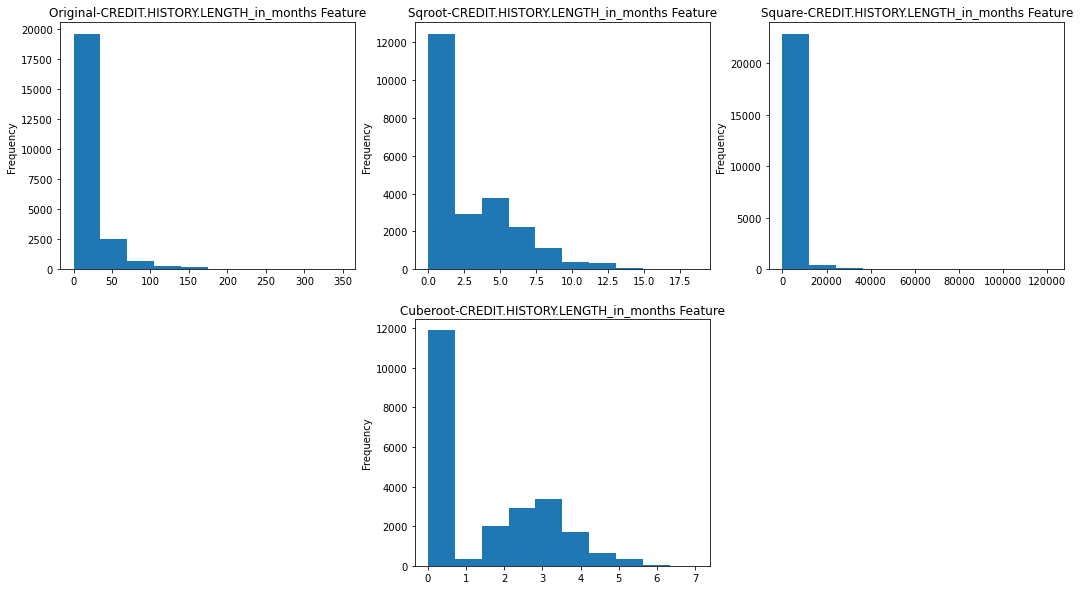

In [210]:
transformation(data,'CREDIT.HISTORY.LENGTH_in_months')

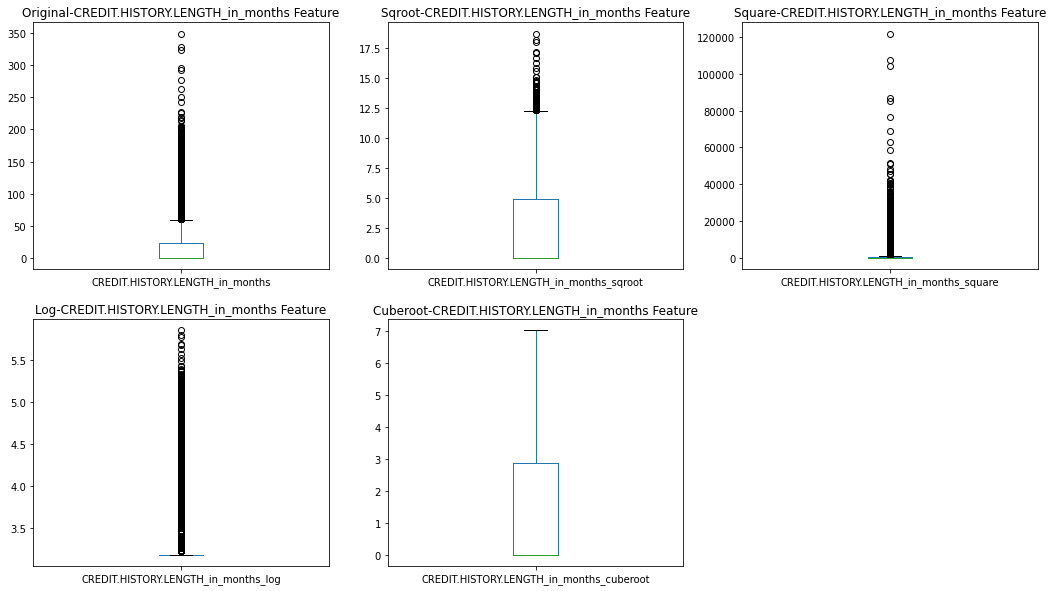

No: of outliers for Original  CREDIT.HISTORY.LENGTH_in_months : 1625
No: of outliers for Sqroot  CREDIT.HISTORY.LENGTH_in_months : 160
No: of outliers for Square  CREDIT.HISTORY.LENGTH_in_months : 3275
No: of outliers for Log   CREDIT.HISTORY.LENGTH_in_months : 0
No: of outliers for Cuberoot  CREDIT.HISTORY.LENGTH_in_months : 0


In [211]:
transformation_box(data, 'CREDIT.HISTORY.LENGTH_in_months')

### Result: Select cube.root transformation  for "Credit_hist length" feature since outlier number decreases 

In [212]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23315 entries, 0 to 23314
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Disbursed_Amount                     23315 non-null  int64  
 1   Asset_Cost                           23315 non-null  int64  
 2   ltv                                  23315 non-null  float64
 3   Employment_Type                      23315 non-null  object 
 4   Aadhar_flag                          23315 non-null  int64  
 5   PAN_flag                             23315 non-null  int64  
 6   VoterID_flag                         23315 non-null  int64  
 7   Driving_flag                         23315 non-null  int64  
 8   PERFORM_CNS.SCORE                    23315 non-null  int64  
 9   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  23315 non-null  int64  
 10  NO.OF_INQUIRIES                      23315 non-null  int64  
 11  Loan_Default                

In [213]:
cat_cols

['Employment_Type',
 'State_Name',
 'Region_Name',
 'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 'Passport_flag',
 'Loan_Default']

In [214]:
cat_cols2= ['Employment_Type',
  'Aadhar_flag',
 'PAN_flag',
 'VoterID_flag',
 'Driving_flag',
 ]

In [215]:
num_cols

['Disbursed_Amount',
 'Asset_Cost',
 'ltv',
 'PERFORM_CNS.SCORE',
 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
 'NO.OF_INQUIRIES',
 'Age',
 'CREDIT.HISTORY.LENGTH_in_months']

In [216]:
# Feature trasnformation

loan['Disbursed_Amount_log'] = np.log(loan['Disbursed_Amount'])
loan['Asset_Cost_log'] = np.log(loan['Asset_Cost'])
loan['ltv_square'] = np.square(loan['ltv'])
loan['Age_log'] = np.log(loan['Age'])
loan['CREDIT.HISTORY.LENGTH_cuberoot'] = np.cbrt(loan['CREDIT.HISTORY.LENGTH_in_months'])


In [217]:
loan.head(2)

,Disbursed_Amount,Asset_Cost,ltv,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Loan_Default,Age,CREDIT.HISTORY.LENGTH_in_months,Disbursed_Amount_log,Asset_Cost_log,ltv_square,Age_log,CREDIT.HISTORY.LENGTH_cuberoot
0,36439,65850,56.19,Self employed,1,0,0,0,0,0,0,0,28.0,0.0,10.503395,11.095135,3157.3161,3.332205,0.000000
1,48749,69303,72.15,Salaried,1,0,0,0,783,0,0,0,28.0,30.0,10.794440,11.146243,5205.6225,3.332205,3.107233


In [218]:
loan.columns

Index(['Disbursed_Amount', 'Asset_Cost', 'ltv', 'Employment_Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 'Loan_Default', 'Age',
       'CREDIT.HISTORY.LENGTH_in_months', 'Disbursed_Amount_log',
       'Asset_Cost_log', 'ltv_square', 'Age_log',
       'CREDIT.HISTORY.LENGTH_cuberoot'],
      dtype='object')

In [219]:
X= loan[['Employment_Type',
       'Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'NO.OF_INQUIRIES', 
        'Disbursed_Amount_log',
       'Asset_Cost_log', 'ltv_square', 'Age_log',
       'CREDIT.HISTORY.LENGTH_cuberoot']]
X.head()

,Employment_Type,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Disbursed_Amount_log,Asset_Cost_log,ltv_square,Age_log,CREDIT.HISTORY.LENGTH_cuberoot
0,Self employed,1,0,0,0,0,0,0,10.503395,11.095135,3157.3161,3.332205,0.000000
1,Salaried,1,0,0,0,783,0,0,10.794440,11.146243,5205.6225,3.332205,3.107233
2,Self employed,1,0,0,0,0,0,0,10.921396,11.102548,7225.0000,3.218876,0.000000
3,Self employed,1,0,0,0,0,0,0,10.796489,11.068714,6077.7616,3.401197,0.000000
4,Self employed,1,0,0,0,14,1,1,10.606437,10.991814,5001.3184,3.784190,3.332222


In [220]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23315 entries, 0 to 23314
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Employment_Type                      23315 non-null  object 
 1   Aadhar_flag                          23315 non-null  int64  
 2   PAN_flag                             23315 non-null  int64  
 3   VoterID_flag                         23315 non-null  int64  
 4   Driving_flag                         23315 non-null  int64  
 5   PERFORM_CNS.SCORE                    23315 non-null  int64  
 6   DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS  23315 non-null  int64  
 7   NO.OF_INQUIRIES                      23315 non-null  int64  
 8   Disbursed_Amount_log                 23315 non-null  float64
 9   Asset_Cost_log                       23315 non-null  float64
 10  ltv_square                           23315 non-null  float64
 11  Age_log                     

In [221]:
y = loan['Loan_Default']
y.head()

0    0
1    0
2    1
3    0
4    0
Name: Loan_Default, dtype: int64

In [222]:
# Encoding

X = pd.get_dummies(X,drop_first=True)
X.head()

,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Disbursed_Amount_log,Asset_Cost_log,ltv_square,Age_log,CREDIT.HISTORY.LENGTH_cuberoot,Employment_Type_Self employed
0,1,0,0,0,0,0,0,10.503395,11.095135,3157.3161,3.332205,0.000000,1
1,1,0,0,0,783,0,0,10.794440,11.146243,5205.6225,3.332205,3.107233,0
2,1,0,0,0,0,0,0,10.921396,11.102548,7225.0000,3.218876,0.000000,1
3,1,0,0,0,0,0,0,10.796489,11.068714,6077.7616,3.401197,0.000000,1
4,1,0,0,0,14,1,1,10.606437,10.991814,5001.3184,3.784190,3.332222,1


In [223]:
#Scaling 

sc= StandardScaler()

for i in X.columns:
    X[i]= sc.fit_transform(X[i].values.reshape(-1,1))

In [224]:
X.head()

,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,Disbursed_Amount_log,Asset_Cost_log,ltv_square,Age_log,CREDIT.HISTORY.LENGTH_cuberoot,Employment_Type_Self employed
0,0.428162,-0.285835,-0.405261,-0.153981,-0.860412,-0.258819,-0.294034,-1.576661,-0.563677,-1.613585,-0.601454,-0.893277,0.853115
1,0.428162,-0.285835,-0.405261,-0.153981,1.452850,-0.258819,-0.294034,-0.342106,-0.318213,-0.319695,-0.601454,1.044841,-1.172175
2,0.428162,-0.285835,-0.405261,-0.153981,-0.860412,-0.258819,-0.294034,0.196415,-0.528071,0.955922,-1.005902,-0.893277,0.853115
3,0.428162,-0.285835,-0.405261,-0.153981,-0.860412,-0.258819,-0.294034,-0.333414,-0.690568,0.231225,-0.355233,-0.893277,0.853115
4,0.428162,-0.285835,-0.405261,-0.153981,-0.819051,2.313373,1.134771,-1.139579,-1.059904,-0.448751,1.011589,1.185177,0.853115


## Modelling

## 1) KNN without SMOTE

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
xtrain,xtest,ytrain,ytest =  train_test_split(X,y,test_size=0.2, random_state=10)

In [227]:
print(f'xtrain shape:{xtrain.shape}')
print(f'ytrain shape:{ytrain.shape}')
print(f'xtest shape:{xtest.shape}')
print(f'ytest shape:{ytest.shape}')

xtrain shape:(18652, 13)
ytrain shape:(18652,)
xtest shape:(4663, 13)
ytest shape:(4663,)


In [228]:
knn = KNeighborsClassifier()

In [229]:
knn.fit(xtrain,ytrain)
y_pred = knn.predict(xtest)

In [230]:
accuracy_score(ytest,y_pred)

0.7330045035384946

In [231]:
precision_score(ytest,y_pred)

0.234375

In [232]:
recall_score(ytest,y_pred)

0.08645533141210375

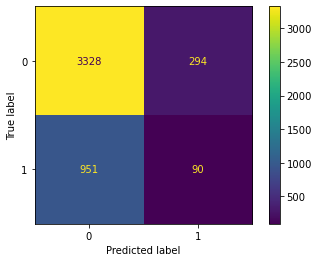

In [233]:
plot_confusion_matrix(knn,xtest,ytest)

In [234]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84      3622
           1       0.23      0.09      0.13      1041

    accuracy                           0.73      4663
   macro avg       0.51      0.50      0.48      4663
weighted avg       0.66      0.73      0.68      4663



In [235]:
roc_auc_score(ytest,knn.predict_proba(xtest)[:,1])

0.5362998083544314

In [236]:
from sklearn.metrics import roc_curve,roc_auc_score

In [237]:
from sklearn.metrics import plot_roc_curve

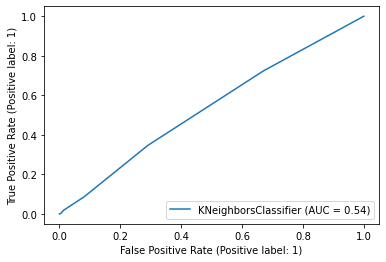

In [238]:
plot_roc_curve(knn, xtest, ytest)

## 2) KNN After SMOTE

In [239]:
from imblearn.over_sampling import SMOTE

In [240]:
sm = SMOTE(random_state=10)

In [241]:
# Before smote
print(f'Count of minority class records before upsampling: {xtrain[ytrain==1].shape[0]}')
print(f'Count of existing Majority class records: {xtrain[ytrain==0].shape[0]}')

Count of minority class records before upsampling: 4085
Count of existing Majority class records: 14567


In [242]:
xtrain_smote, ytrain_smote = sm.fit_resample(xtrain,ytrain)

In [243]:
# After smote
print(f'Count of minority class(class 1) records after SMOTE : {xtrain_smote[ytrain_smote==1].shape[0]}')
print(f'Count of existing Majority class(class 0) records: {xtrain_smote[ytrain_smote==0].shape[0]}')

Count of minority class(class 1) records after SMOTE : 14567
Count of existing Majority class(class 0) records: 14567


In [244]:
ytrain_smote.value_counts()

0    14567
1    14567
Name: Loan_Default, dtype: int64

In [245]:
knn.fit(xtrain_smote, ytrain_smote)
y_pred_smote = knn.predict(xtest)

In [246]:
accuracy_score(ytest,y_pred_smote)

0.5683036671670598

In [247]:
precision_score(ytest,y_pred_smote)

0.25025693730729703

In [248]:
recall_score(ytest,y_pred_smote)

0.4678194044188281

In [249]:
print(classification_report(ytest,y_pred_smote))

              precision    recall  f1-score   support

           0       0.80      0.60      0.68      3622
           1       0.25      0.47      0.33      1041

    accuracy                           0.57      4663
   macro avg       0.52      0.53      0.50      4663
weighted avg       0.67      0.57      0.60      4663



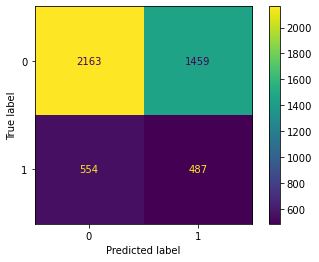

In [250]:
plot_confusion_matrix(knn,xtest,ytest)

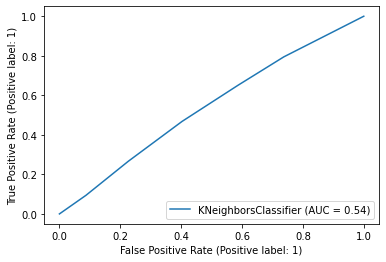

In [251]:
plot_roc_curve(knn, xtest, ytest)

In [252]:
roc_auc_score(ytest,knn.predict_proba(xtest)[:,1])

0.5413501968703371

## Result (KNN):  ROC_AUC value improved slightly from 0.536 to 0.541 after applying SMOTE

## 3) Decision Tree (before SMOTE)

In [253]:
from sklearn.tree import DecisionTreeClassifier

In [254]:
clf = DecisionTreeClassifier()

In [255]:
clf.fit(xtrain,ytrain) 
y_pred2 = clf.predict(xtest)

In [256]:
accuracy_score(ytest,y_pred2)

0.6568732575595111

In [257]:
precision_score(ytest,y_pred2)

0.24381301558203483

In [258]:
recall_score(ytest,y_pred2)

0.25552353506243997

In [259]:
print(classification_report(ytest,y_pred2))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      3622
           1       0.24      0.26      0.25      1041

    accuracy                           0.66      4663
   macro avg       0.51      0.51      0.51      4663
weighted avg       0.66      0.66      0.66      4663



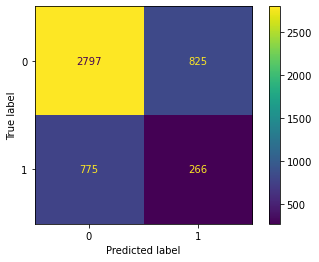

In [260]:
plot_confusion_matrix(clf,xtest,ytest)

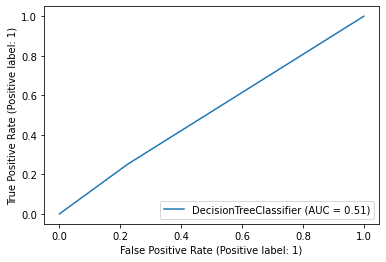

In [261]:
#ROC Curve
plot_roc_curve(clf, xtest, ytest)

In [262]:
roc_auc_score(ytest,clf.predict_proba(xtest)[:,1])

0.5136688695563614

## 4) Decision Tree after SMOTE

In [263]:
clf = DecisionTreeClassifier()

In [264]:
clf.fit(xtrain_smote, ytrain_smote) 
y_pred2_smote = clf.predict(xtest)

In [265]:
accuracy_score(ytest,y_pred2_smote)

0.6283508470941453

In [266]:
precision_score(ytest,y_pred2_smote)

0.2535612535612536

In [267]:
print(classification_report(ytest,y_pred2_smote))

              precision    recall  f1-score   support

           0       0.79      0.71      0.75      3622
           1       0.25      0.34      0.29      1041

    accuracy                           0.63      4663
   macro avg       0.52      0.53      0.52      4663
weighted avg       0.67      0.63      0.65      4663



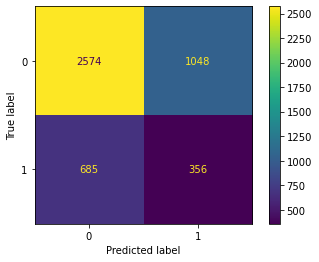

In [268]:
plot_confusion_matrix(clf,xtest,ytest)

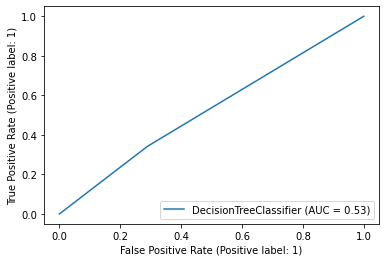

In [269]:
#ROC Curve
plot_roc_curve(clf, xtest, ytest)

In [270]:
roc_auc_score(ytest,clf.predict_proba(xtest)[:,1])

0.5263179810009384

## Result (Decision Tree) : ROC_AUC value improved slightly from 0.513 to 0.526 after applying SMOTE

## 5) Logistic Regression (before SMOTE)

In [271]:
xtrain,xtest,ytrain,ytest= train_test_split(X,y, test_size=0.2,random_state=10)

In [272]:
print("xtrain shape: ", xtrain.shape)
print("xtest shape: ", xtest.shape)
print("ytrain shape: ", ytrain.shape)
print("ytest shape: ", ytest.shape)

xtrain shape:  (18652, 13)
xtest shape:  (4663, 13)
ytrain shape:  (18652,)
ytest shape:  (4663,)


In [273]:
from sklearn.linear_model import LogisticRegression

In [274]:
log_model= LogisticRegression()
log_model.fit(xtrain,ytrain)

LogisticRegression()

In [275]:
prob_pred_y1 = log_model.predict_proba(xtest)
prob_pred_y1

array([[0.72889278, 0.27110722],
       [0.83795664, 0.16204336],
       [0.80938378, 0.19061622],
       ...,
       [0.76425167, 0.23574833],
       [0.83217811, 0.16782189],
       [0.75221745, 0.24778255]])

In [276]:
pred_y1 = log_model.predict(xtest)
pred_y1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [277]:
accuracy_score(ytest,pred_y1)

0.7771820716277075

In [278]:
precision_score(ytest,pred_y1)

0.75

In [279]:
f1_score(ytest,pred_y1)

0.005741626794258372

In [280]:
roc_auc_score(ytest,pred_y1)

0.5013028769113502

In [281]:
print(classification_report(ytest,pred_y1))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87      3622
           1       0.75      0.00      0.01      1041

    accuracy                           0.78      4663
   macro avg       0.76      0.50      0.44      4663
weighted avg       0.77      0.78      0.68      4663



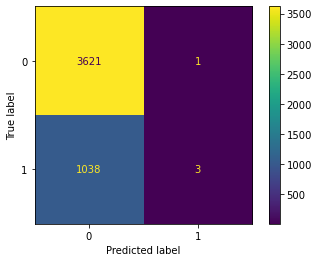

In [282]:
plot_confusion_matrix(log_model, xtest, ytest)

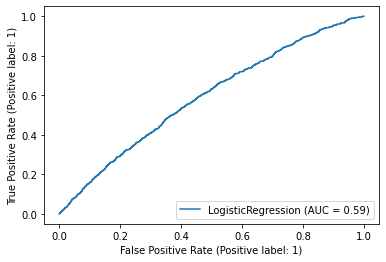

In [283]:
plot_roc_curve(log_model, xtest, ytest)

## 6) Logistic Regression (After SMOTE)

In [284]:
log_model2= LogisticRegression()
log_model2.fit(xtrain_smote, ytrain_smote)

LogisticRegression()

In [285]:
prob_pred_y2 = log_model2.predict_proba(xtest)
prob_pred_y2

array([[0.42367679, 0.57632321],
       [0.5929585 , 0.4070415 ],
       [0.54486574, 0.45513426],
       ...,
       [0.46616691, 0.53383309],
       [0.58481103, 0.41518897],
       [0.46332026, 0.53667974]])

In [286]:
pred_y2 = log_model2.predict(xtest)
pred_y2

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [287]:
accuracy_score(ytest,pred_y2)

0.5577954106798199

In [288]:
recall_score(ytest,pred_y2)

0.5782901056676273

In [289]:
precision_score(ytest,pred_y2)

0.270561797752809

In [290]:
f1_score(ytest,pred_y2)

0.36864666258420087

In [291]:
print(classification_report(ytest,pred_y2))

              precision    recall  f1-score   support

           0       0.82      0.55      0.66      3622
           1       0.27      0.58      0.37      1041

    accuracy                           0.56      4663
   macro avg       0.55      0.57      0.51      4663
weighted avg       0.70      0.56      0.59      4663



In [292]:
roc_auc_score(ytest,pred_y2)

0.5650975652578888

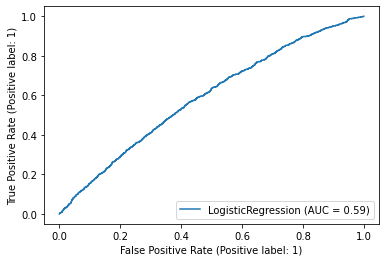

In [293]:
plot_roc_curve(log_model2, xtest, ytest)

## Result (Logistic Regression): ROC_AUC value improved  from 0.501 to 0.565 after applying SMOTE

## 7) Random Forest Classifier

In [311]:
from sklearn.ensemble import RandomForestClassifier

In [313]:
rf = RandomForestClassifier(n_estimators=80,oob_score=True,random_state=400) 

In [314]:
rf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=80, oob_score=True, random_state=400)

In [315]:
rf.oob_score_

0.7665129744799485

In [316]:
#Parameter tuning
ls=[]
for w in range(20,300,10):
    clf=RandomForestClassifier(oob_score=True,n_estimators=w,random_state=400)
    clf.fit(xtrain,ytrain)
    oob=clf.oob_score_
    print('For n_estimators = ', w)
    print('OOB score is ', oob)
    print('************************')
    ls.append((oob,w))

For n_estimators =  20
OOB score is  0.748016298520266
************************
For n_estimators =  30
OOB score is  0.7566480806347845
************************
For n_estimators =  40
OOB score is  0.7598112802916577
************************
For n_estimators =  50
OOB score is  0.7628672528415184
************************
For n_estimators =  60
OOB score is  0.7646365001072271
************************
For n_estimators =  70
OOB score is  0.7665129744799485
************************
For n_estimators =  80
OOB score is  0.7665129744799485
************************
For n_estimators =  90
OOB score is  0.7683358352991636
************************
For n_estimators =  100
OOB score is  0.7696225605833155
************************
For n_estimators =  110
OOB score is  0.7694081063692901
************************
For n_estimators =  120
OOB score is  0.7701050825648724
************************
For n_estimators =  130
OOB score is  0.7697297876903281
************************
For n_estimators =  140
O

In [317]:
print(max(ls))  # To get n_estimators having Max oob_score 

(0.7710701265279862, 220)


In [318]:
clf=RandomForestClassifier(oob_score=True,n_estimators=220,random_state=400)
clf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=220, oob_score=True, random_state=400)

In [319]:
clf.oob_score_

0.7710701265279862

In [320]:
y_pred = clf.predict(xtest)

In [321]:
accuracy_score(ytest,y_pred)

0.7664593609264422

In [322]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.87      3622
           1       0.33      0.04      0.08      1041

    accuracy                           0.77      4663
   macro avg       0.55      0.51      0.47      4663
weighted avg       0.68      0.77      0.69      4663



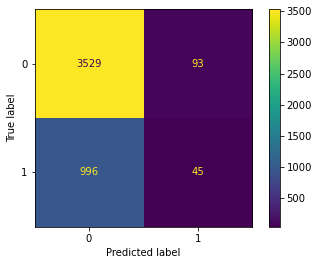

In [325]:
plot_confusion_matrix(clf, xtest, ytest)

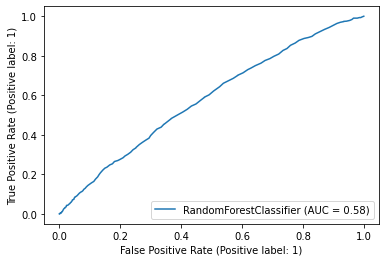

In [324]:
plot_roc_curve(clf, xtest, ytest)